# Introduction to Reinforcement Learning with OpenAI Gym

Link DeepMind Breakout video: https://www.youtube.com/watch?v=Q70ulPJW3Gk


## Contents
* Reinforcement learning
* Q-learning 
* Gå gjennom Pseudo-algortimen fra paper
* Exploration-exploitation trade-off
* Model
* Replay memory
* Target network
* OpenAI Gym
* Putting everything together: DQN
* Training
* Using trained network / Continue learning

## Sources
* Notebook med god beskrivelse av DQN: https://github.com/fg91/Deep-Q-Learning/blob/master/DQN.ipynb
* Artikkel som også forklarer implementasjon av DQN: https://becominghuman.ai/lets-build-an-atari-ai-part-1-dqn-df57e8ff3b26 og https://becominghuman.ai/beat-atari-with-deep-reinforcement-learning-part-2-dqn-improvements-d3563f665a2c
* DeepMind - Playing Atari with Deep Reinforcement Learning: https://arxiv.org/pdf/1312.5602.pdf
* Skymind - Reinforcement learning https://skymind.ai/wiki/deep-reinforcement-learning
* Book about reinforcement learning: https://drive.google.com/file/d/1opPSz5AZ_kVa1uWOdOiveNiBFiEOHjkG/view
* OpenAI docs: http://gym.openai.com/docs/

## Reinforcement Learning Libaries
* OpenAI baselines: https://github.com/openai/baselines
* Coach https://github.com/NervanaSystems/coach
* Keras-RL https://github.com/keras-rl/keras-rl
* Tensorforce https://github.com/reinforceio/tensorforce

## Reinforcement Learning

Reinforcement learning is an machine learning algorithm that learns to achieve a complex goal in an interactive environment by maximizing some reward. Simply put; the algorithm (agent) learns to achieve this goal by letting it explore the environment (ex. a game) and giving it reward when the score increases and punish (negative reward?) when the score decreases. The aim is to learn sequences of actions that will lead to maximal (future) reward. For example in video games the goal is to finish the game with highest score possible. The "agent-environment" loop is illustrated below:
<img src="resources/rl.jpg" style="width:500px;">
source: http://incompleteideas.net/book/bookdraft2017nov5.pdf

In comparison to supervised learning, there is an delay between action and reward. This means that the agent doesn't always get immiediate reward for an action but gets the reward later in the game once it scores a point. The action, however, might be crucial for achieving the score. 

>From the paper: Note that in general the game score may depend on the
whole prior sequence of actions and observations; feedback about an action may only be received
after many thousands of time-steps have elapsed

Toy example:
<img src="resources/toy_example_1.png" style="width:300px;">

Maximum expected __return__ of an action at time $t$
$$R_t=r_t+r_{t+1}+r_{t+2}+r_{t+3}=\sum^T_{i=t}r_i$$

Where $r_t$ is the immediate reward and $r_{t+1}$ is the reward one step from now etc and __T__ is the time-step at which the game terminates

Another quote:
>Infinite total rewards can create a bunch of weird issues: for example, how do you choose between an algorithm that gets +1 at every step and one that gets +1 every 2 steps? The answer might seem obvious, but without discounting, both have a total reward of infinity and are thus equivalent!

##### Discounting
The problem of infinite future reward is met by introducing a discounting factor $0<\gamma<1$

$$R_t=r_{t}+\gamma r_{t+1}+\gamma^2 r_{t+2}+...=r_{t}+\gamma (r_{t+1}+\gamma (r_{t+2}+...))=r_t+\gamma R_{t+1}$$
Where $R_t$ the expected return at time $t$. 

When using $\gamma=0.99$ the expected return for going left in the example above will be:
$$R_1=0+1\times 0.99+0\times 0.99^2+1\times 0.99^3+0\times 0.99^4+0\times 0.99^5+1\times 0.99^6=2.901$$

## MDP and terminology
Reinforcement learning is a technique used to solve Markov Decision Process (MDP). An MDP provides a mathematical framework for modeling decision-making situations where outcomes are partly random and partly under the control of the decision maker. MDP is a formal way of describing a game using the concepts of states, actions and rewards. https://becominghuman.ai/lets-build-an-atari-ai-part-0-intro-to-rl-9b2c5336e0ec

### Environment
The environment is the object that the agent acts on, which in this case is the game itself ex. Breakout

### State
The current situation of the game the agent is in. This could for example be the current frame in the Atari game. However, by looking at the image below, it is not possible to determine which direction the ball is going. ... DeepMind solved this problem by bringing in some previous history in to the state. DeepMind chose to use the past 4 frames which is used as a single state.
<img src="resources/state_0.png" style="width:500px">





After stacking 4 frames:

<img src="resources/breakout_stacked_2.gif" style="width:200px;margin-left:200px" align="left">
<img src="resources/breakout_stacked_0.gif" style="width:200px;margin-left:500px">

### Action
Action is a command that is given to the enviroment to reach as certain state. In Breakout we are going to use set of 4 actions: 

"Do nothing"[0], "ask for ball"[1], left[2], right[3]


### Policy
The core problem of an MDP is to find a policy to decision maker which is used to find the optimal action. Policy is the output of any reinforcement learning algorithm. Policy is simply the strategy that the agent employs to determine the next action based on the current state


## Q-learning
The goal of Q-Learning is to learn a policy, which tells an agent what action to take under what circumstances. Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over all successive steps, starting from the current state future rewards

>We define the optimal action-value function $Q^*(s,a)$ as the maximum expected return achieved by following any strategy after seeing some state $s$ and taking some action $a$

The $Q^*(s,a)$ value is defined as:
$$Q^*(s,a)=r+\gamma max_{a}Q^*(s^{'},a^{'})$$
Where $s^{'}$ is the next state and $a^{'}$ is the next optimal action. This is also called __Bellman equation__.

Assuming that $Q^*(s,a)$ is known, Q-learning then uses the policy below when deciding the next action:

$$\pi(s) = argmax_a(Q^*(s,a)) \quad \text{where $\pi(s)$ is the policy at state s}$$

Deep Q learning uses a neural network to find an approximation of $Q^*(s,a)\approx Q(s,a)$ using the loss function:
$$L=(Q_{target}-Q)=(r+\gamma max_{a}Q(s^{'},a^{'})-Q(s,a))$$

Example of Q-value update using linear model:
$$Q_{new}(s,a)=Q(s,a)+\lambda (r+\gamma max_{a}Q(s^{'},a^{'})-Q(s,a))$$



Example of how Q-learning works:
<img src="resources/toy_example_2.png" style="width:300px;">


## Exploration

## Replay Memory

<img src="resources/pseudo_alg.png">

## Implementing Deep Q Neural Network with Keras And OpenAI Gym

### OpenAi Gym

In this tutorial we will be using the OpenAi Gym library. OpenAi is a company that is doing research on reinforcement learning and provides us a easy to use library called Gym that can simulate reinforcment environments which we can interact with.

Gym can be installed using the pip command:

pip install gym

#### Example code for how to simulate the environment

The code below shows example of using the Gym library and is the code you need to know about Gym for implementing reinforcement learning. The code simulates the Breakout environment and performs random action on each frame. This means that it won't learn anything.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 30.0, frames[0].shape[0] / 30.0), dpi = 72)
    patch = plt.imshow(frames[0], cmap='gray')
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=30)
    display(display_animation(anim, default_mode='loop'))


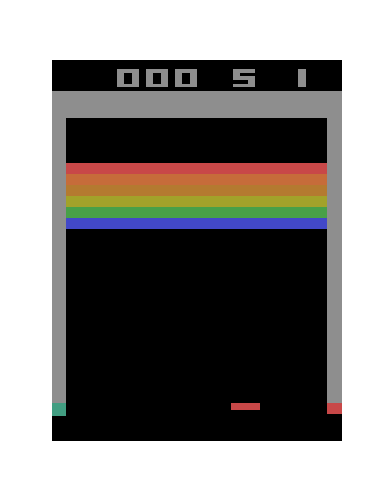
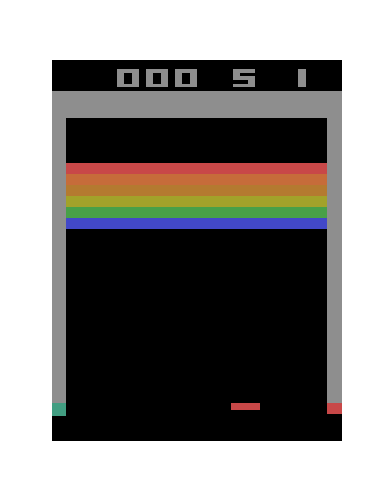
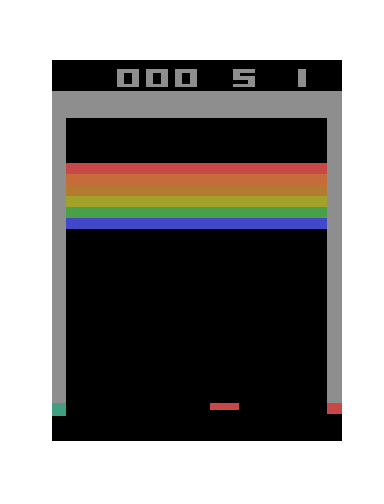
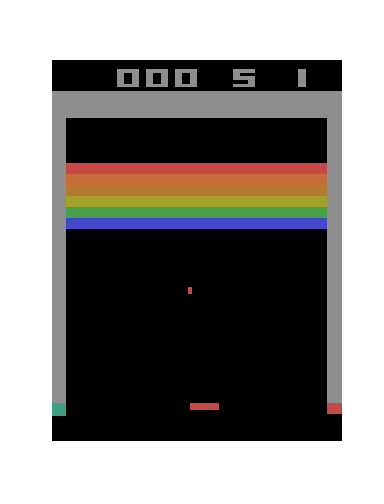
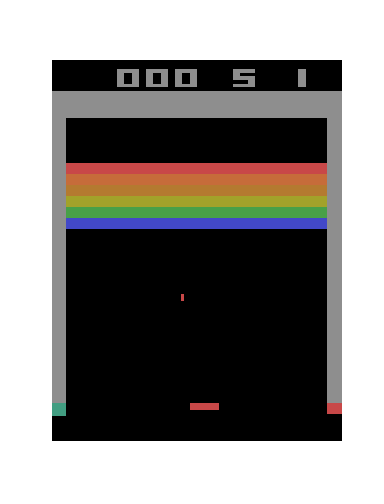
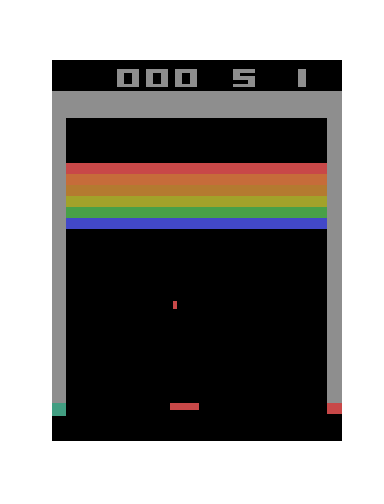
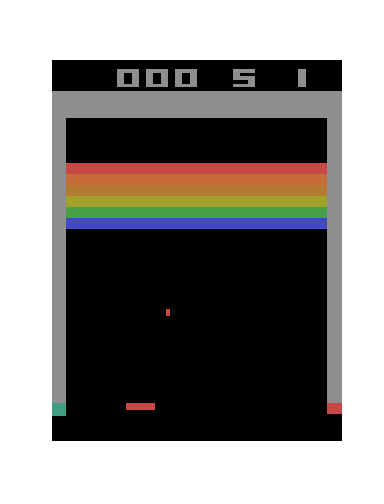
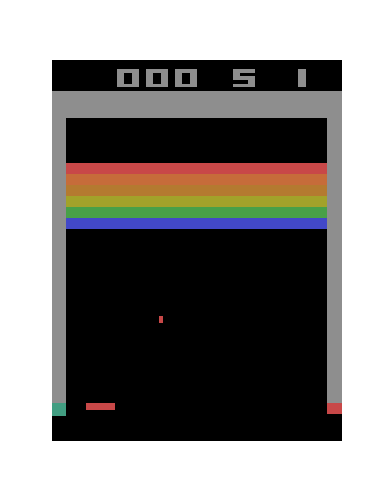
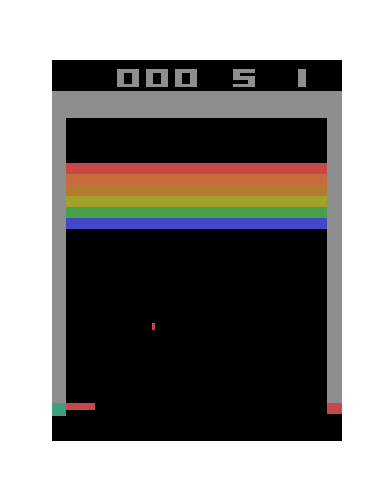
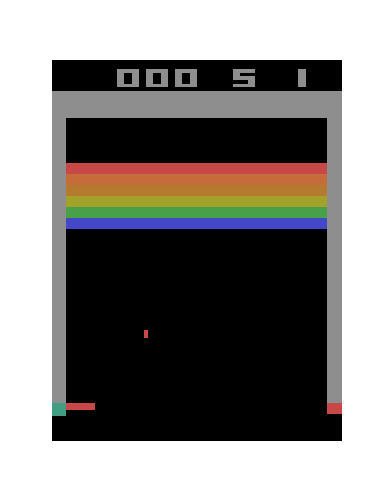
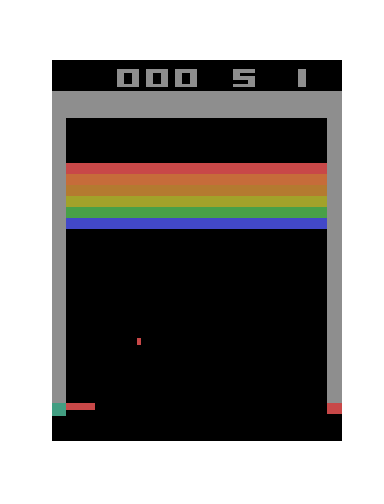
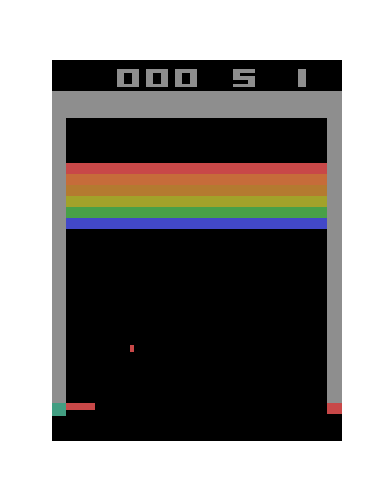
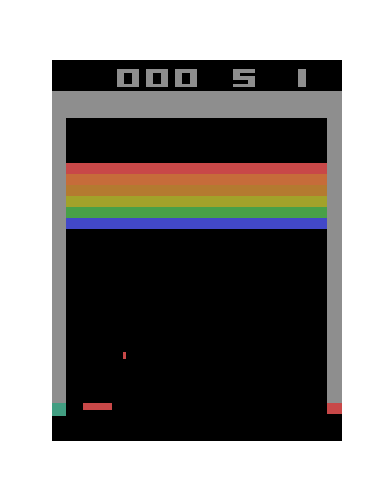
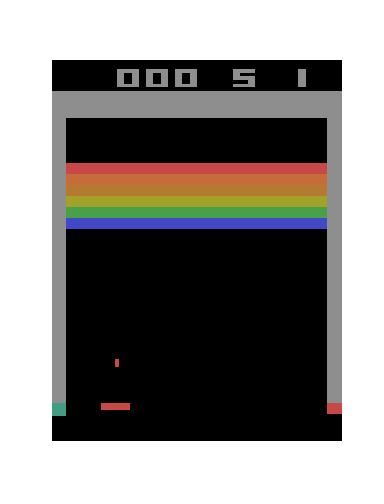
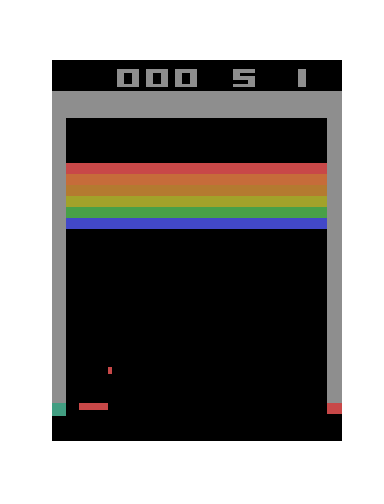
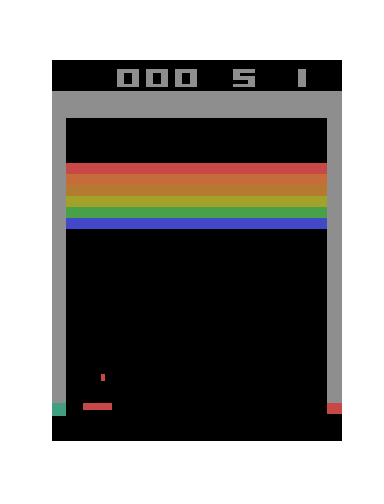
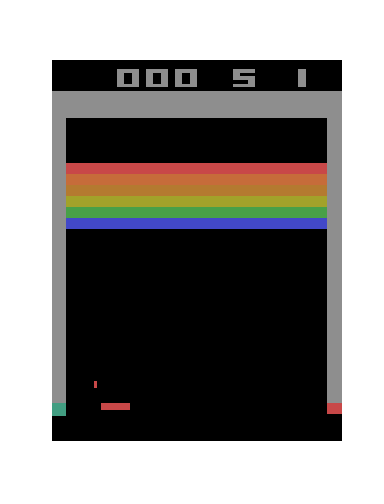
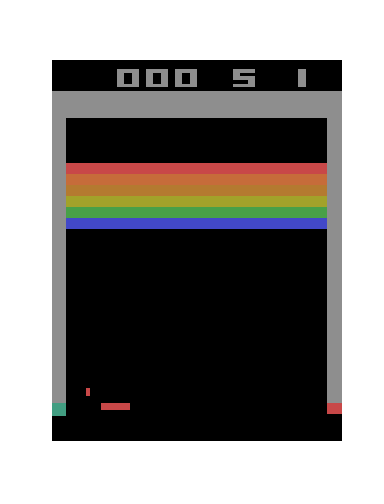
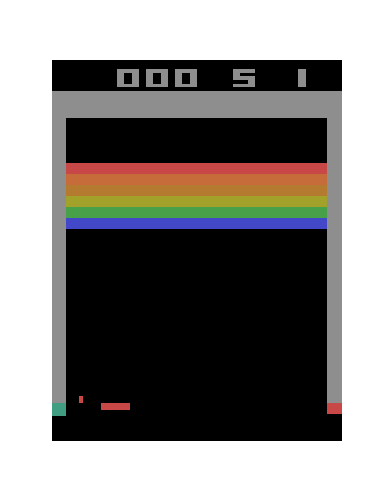
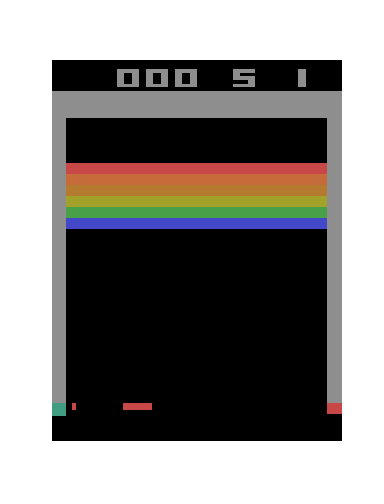
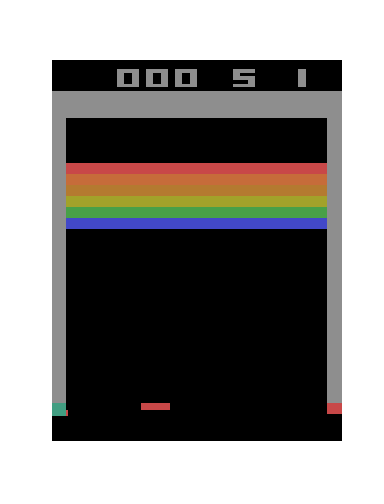
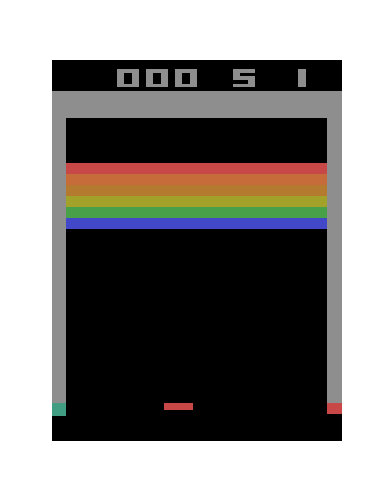
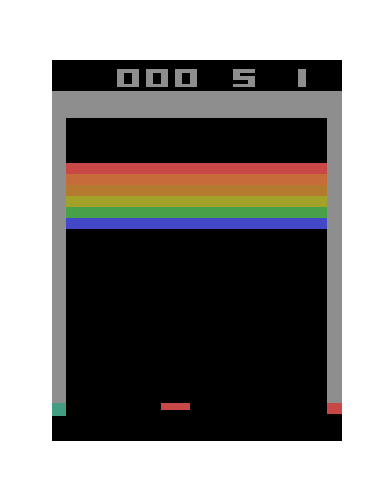
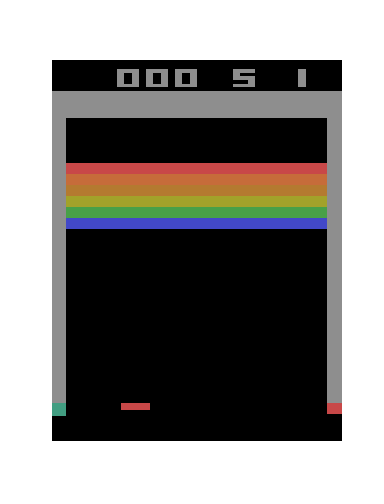
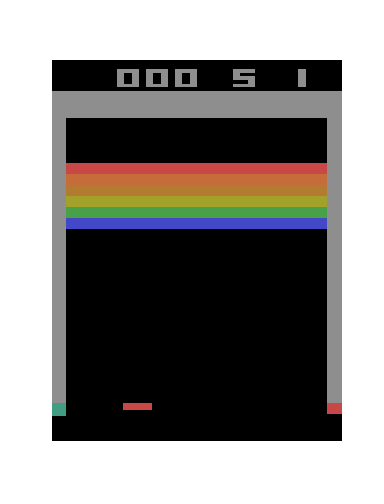
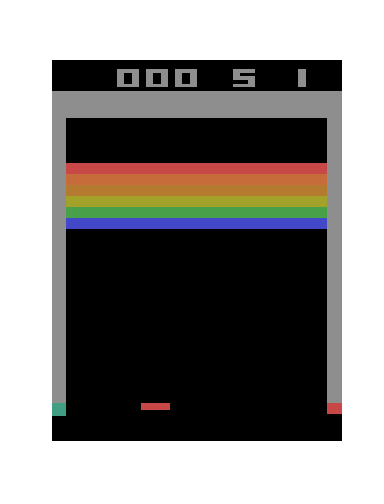
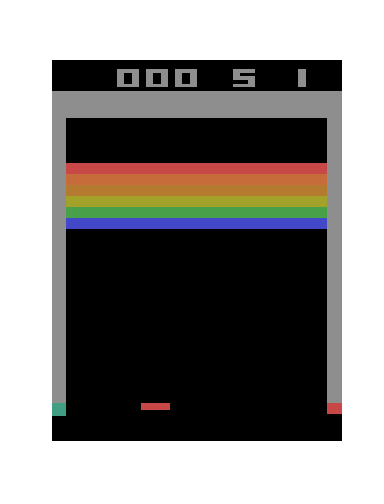
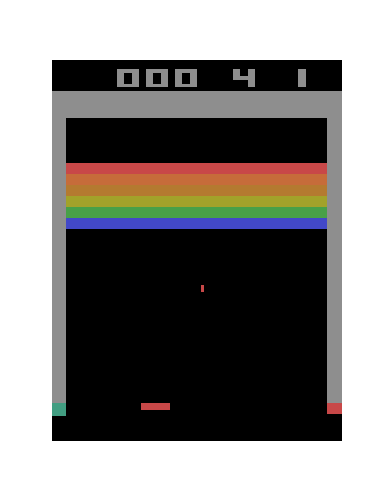
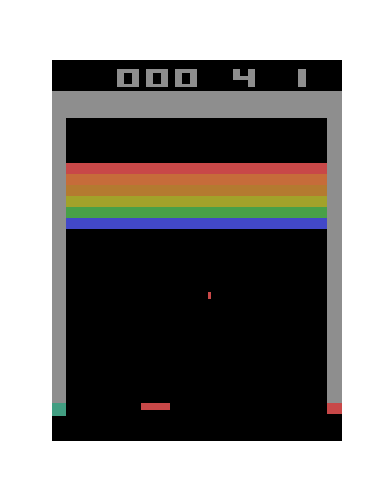
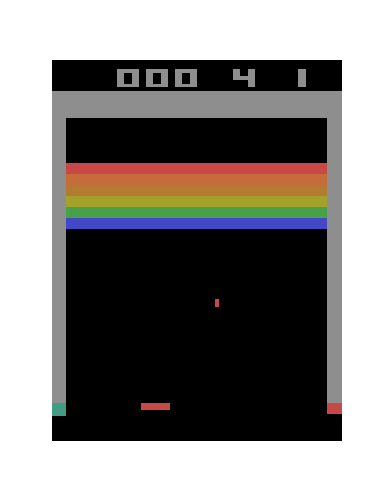
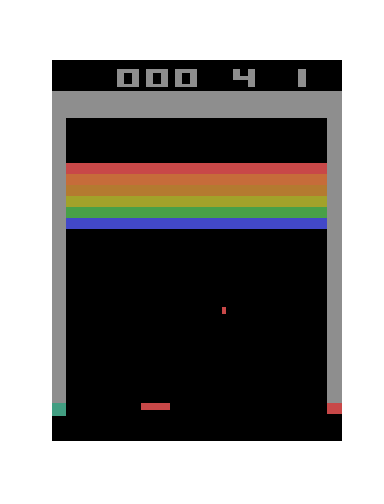
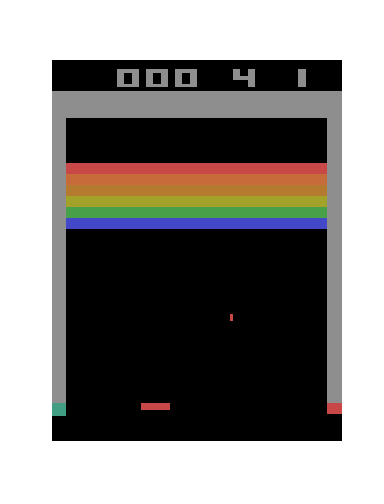
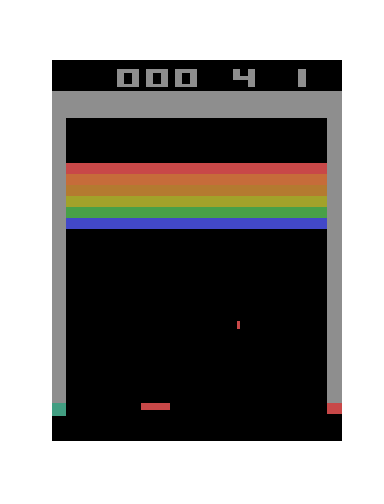
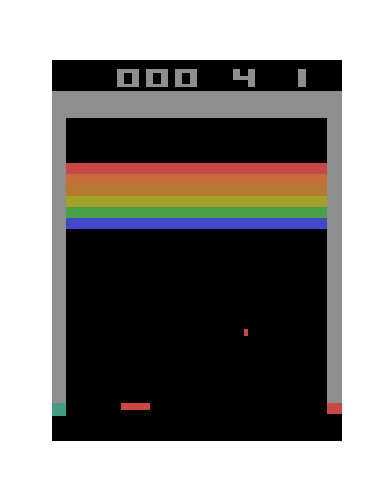
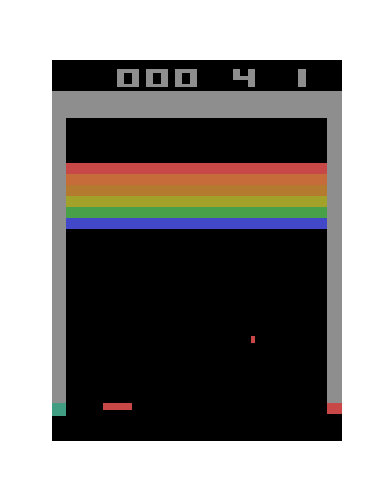
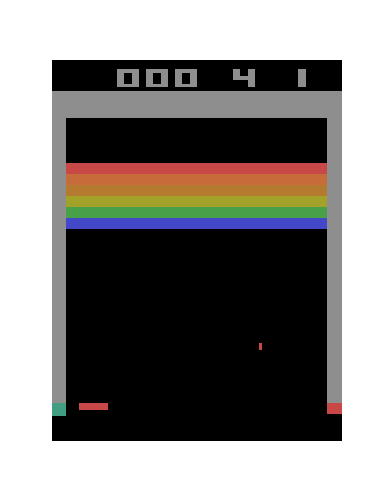
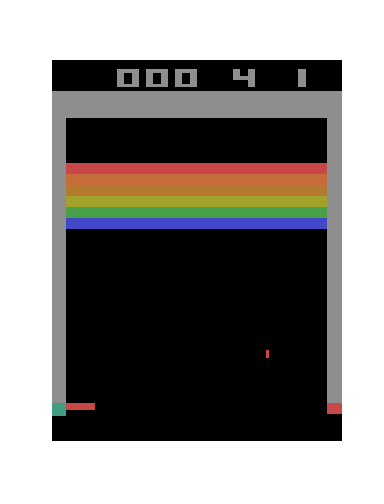
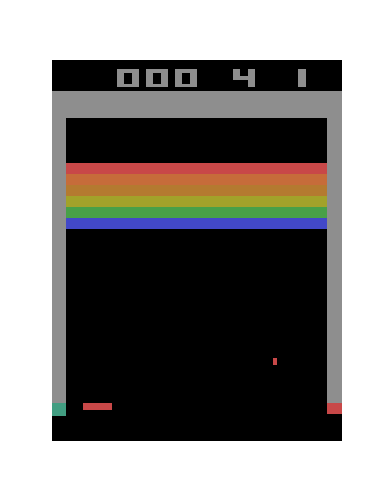
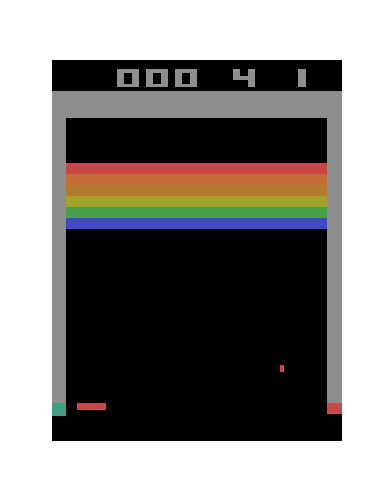
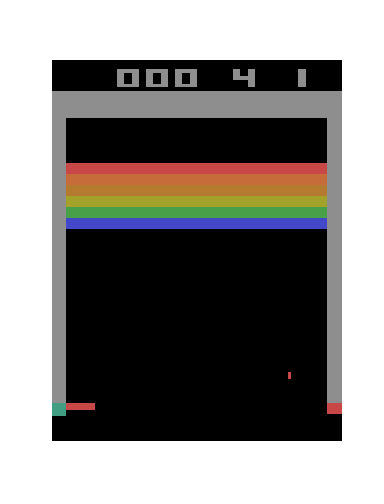
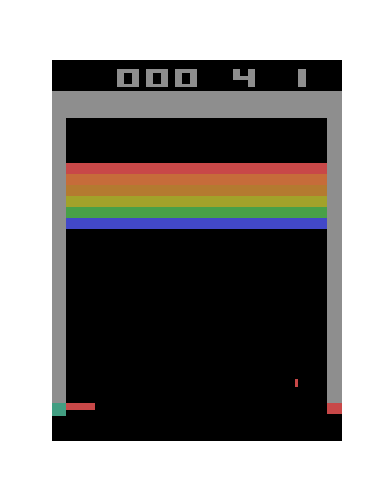
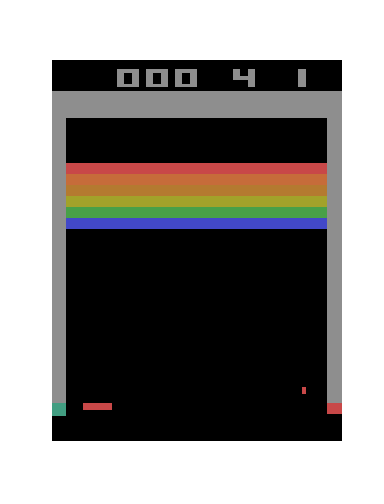
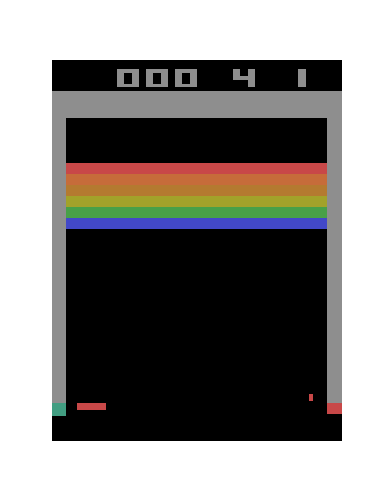
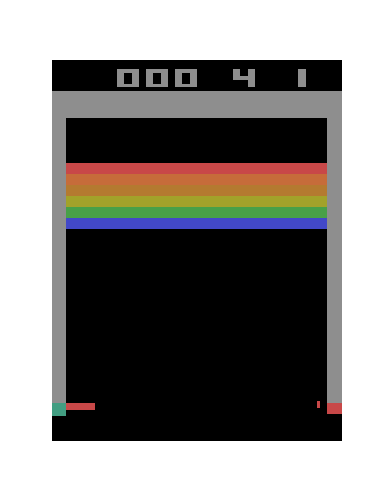
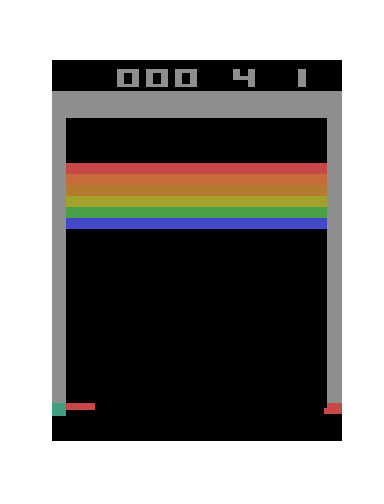
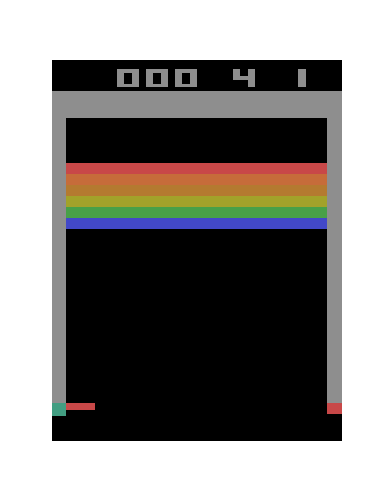
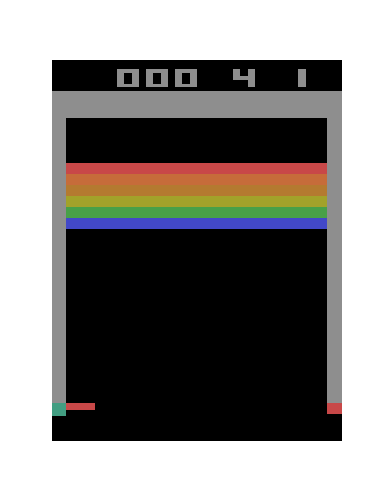
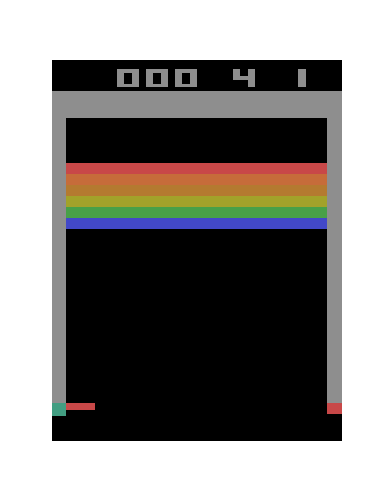
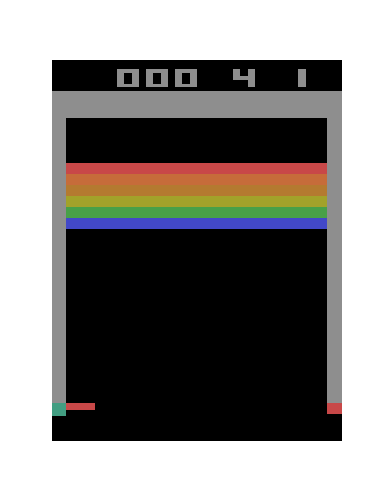
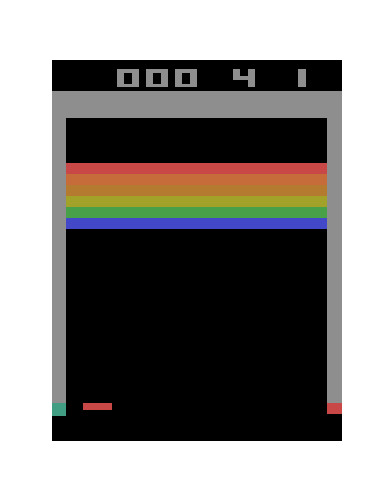
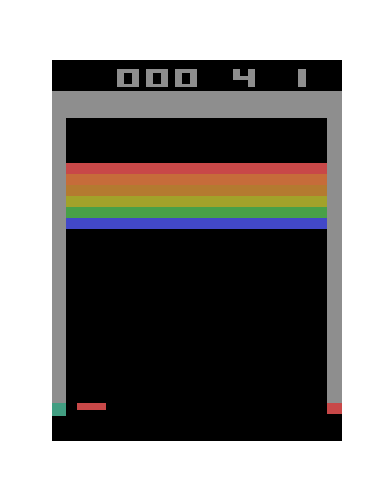
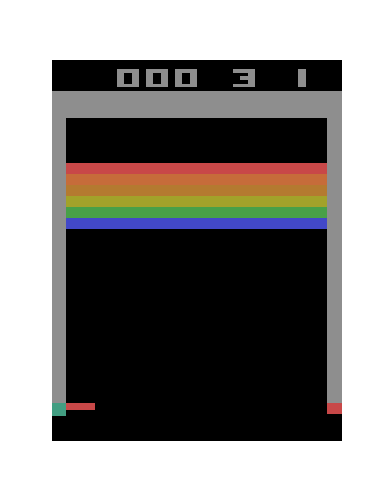
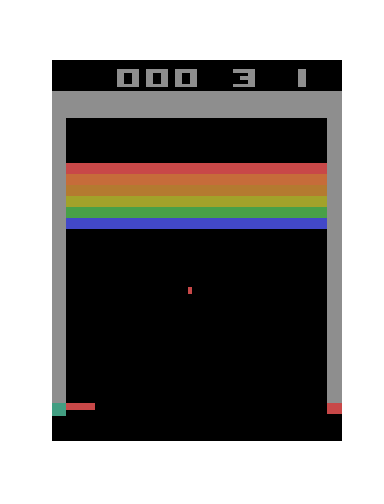
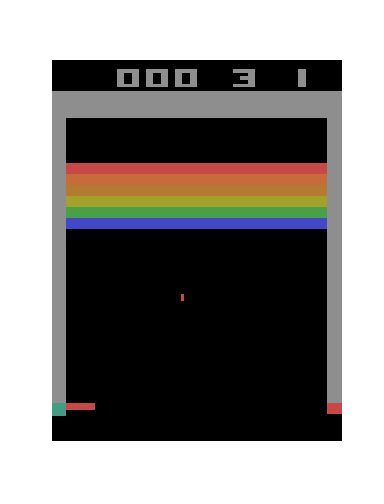
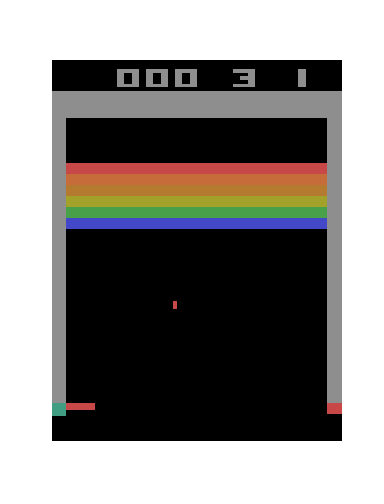
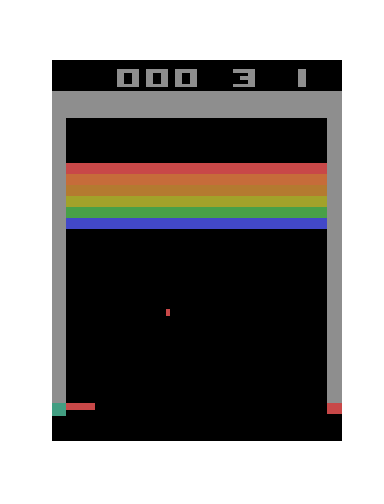
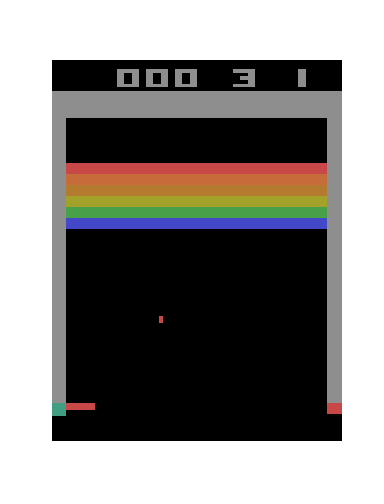
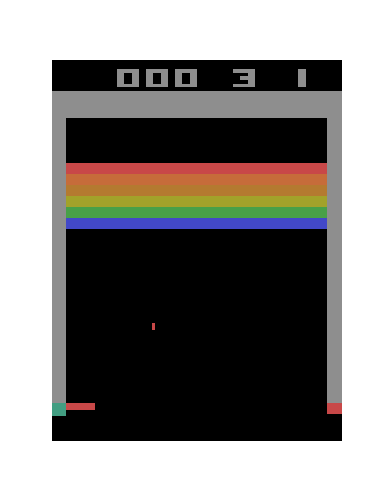
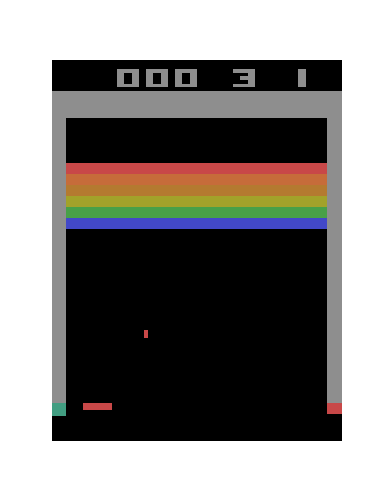
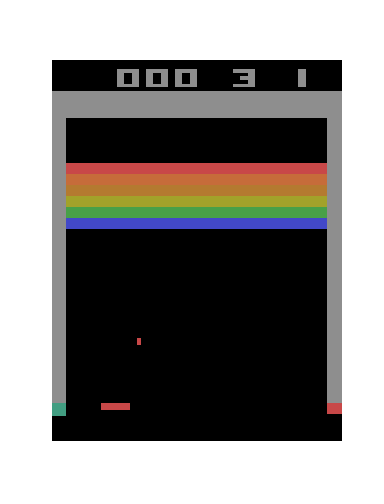
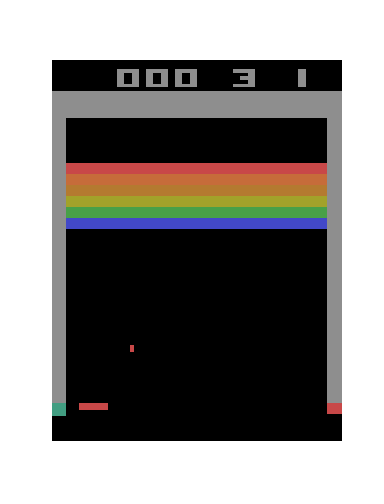
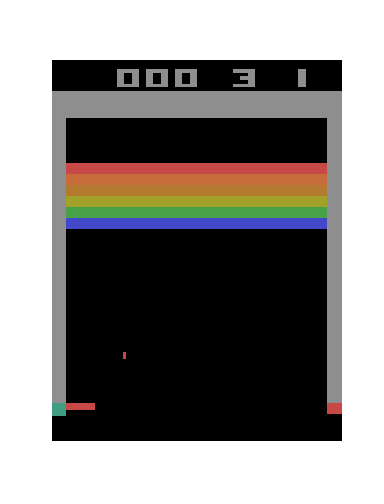
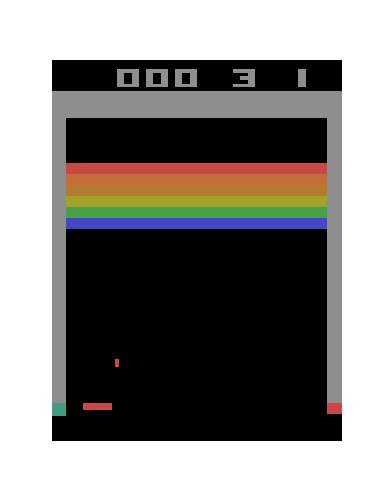
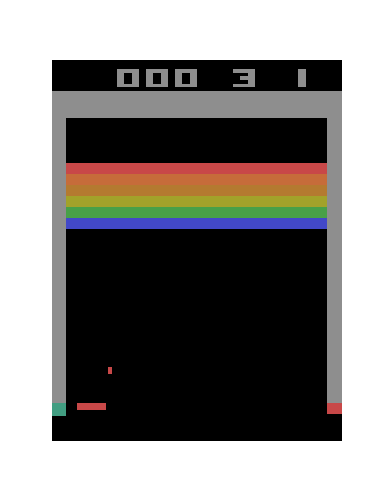
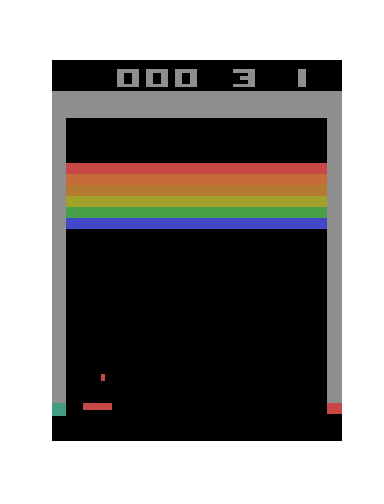
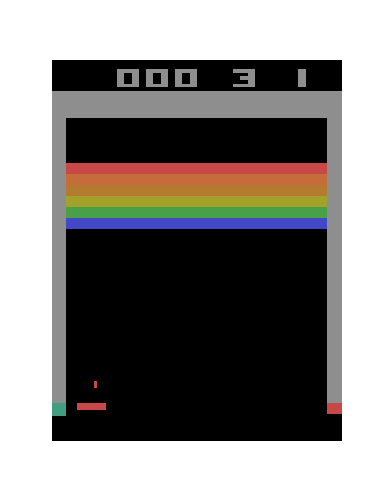
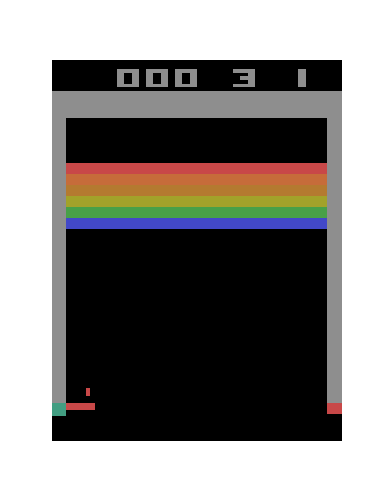
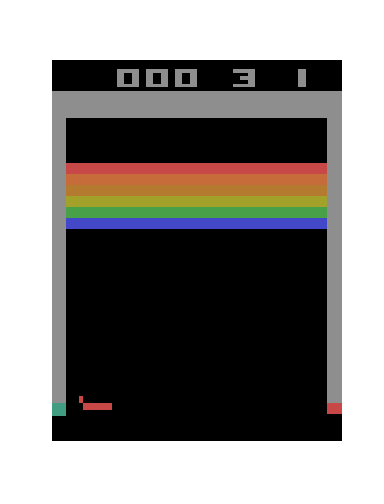
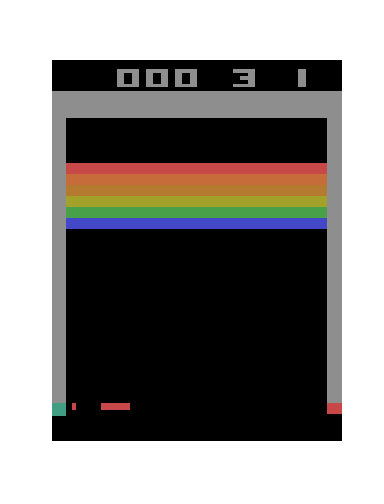
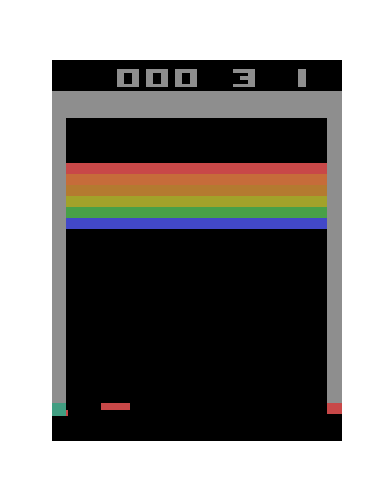
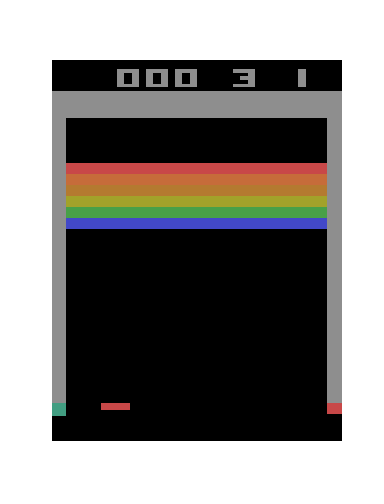
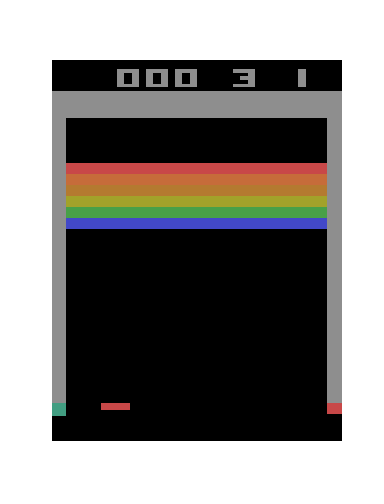
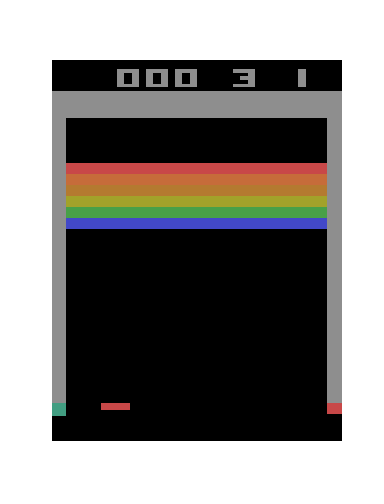
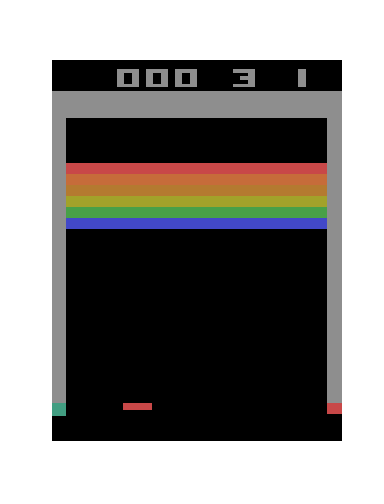
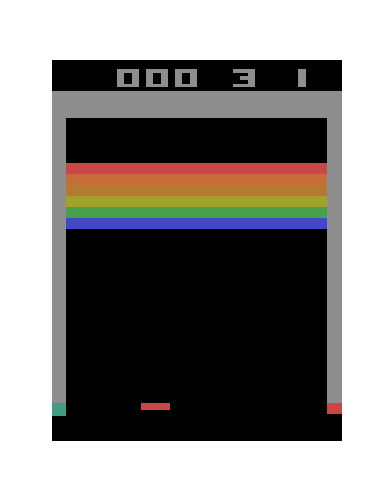
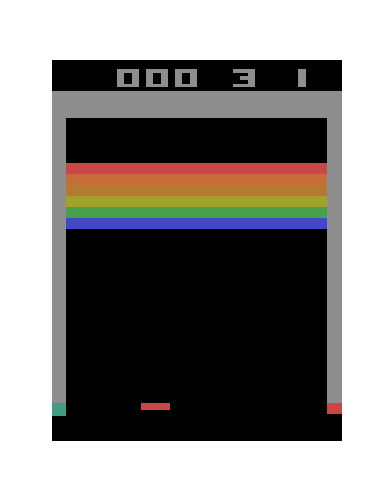
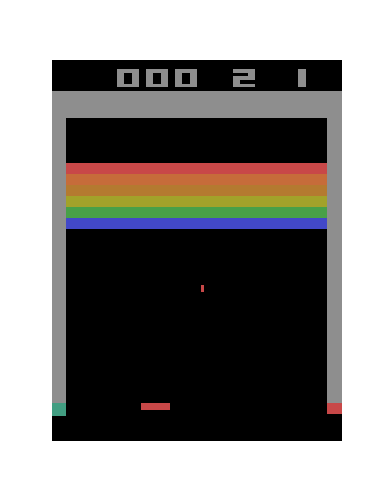
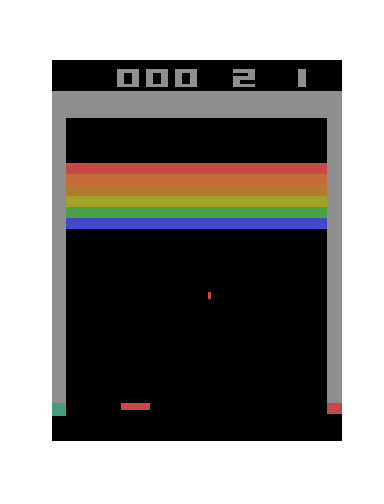
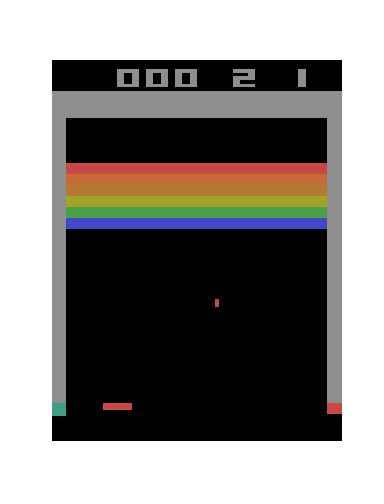
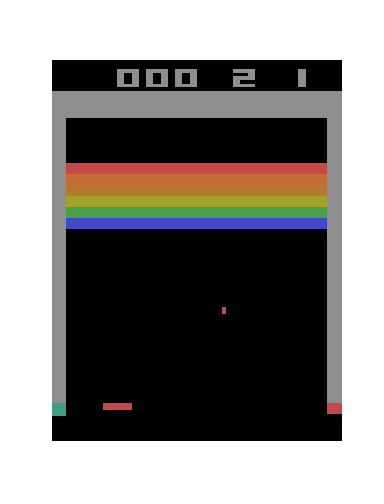
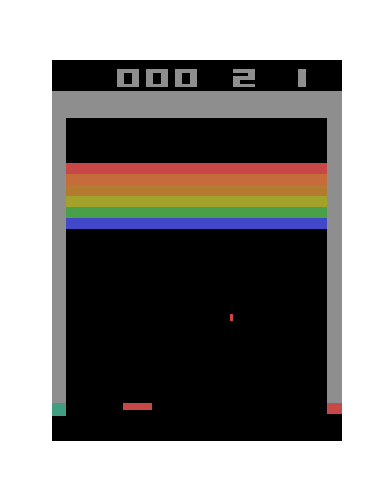
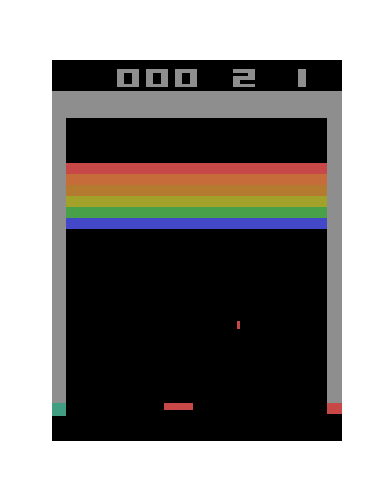
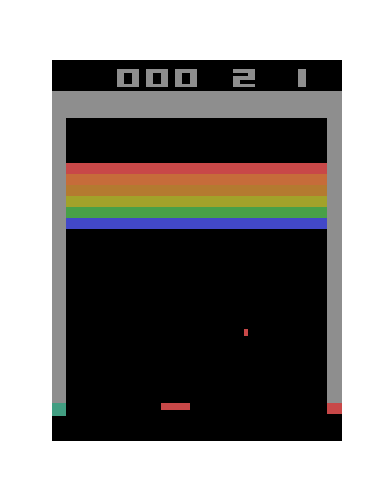
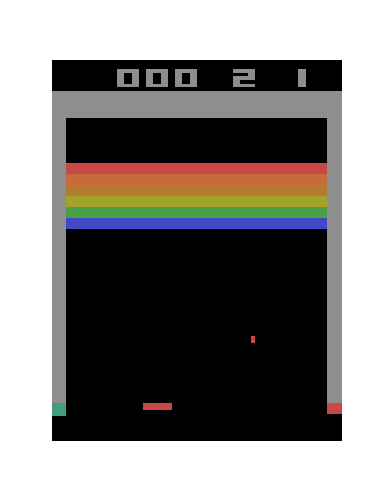
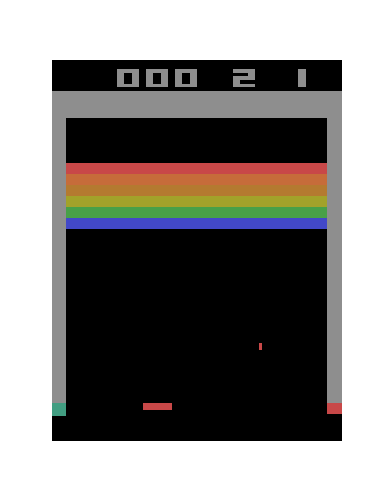
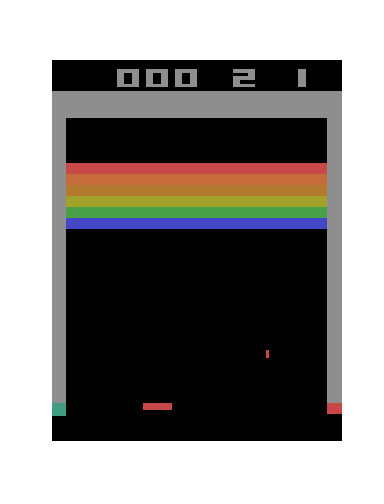
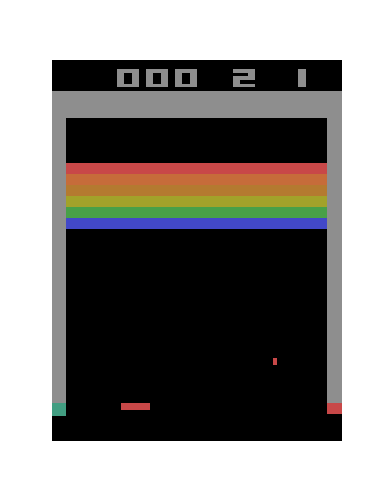
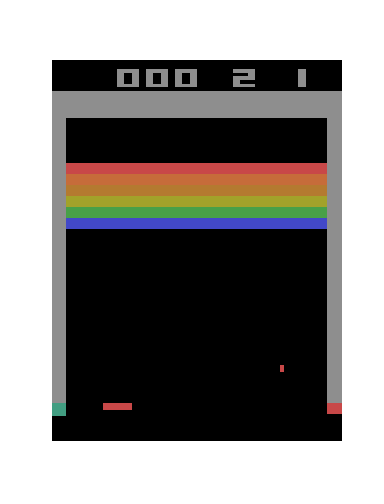
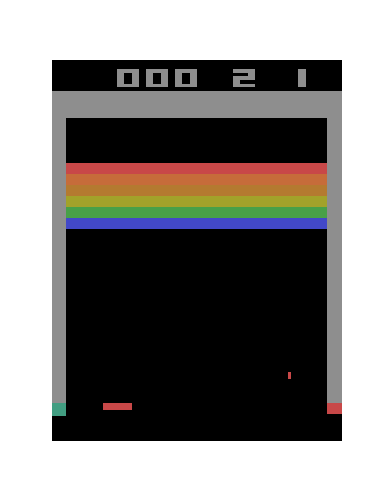
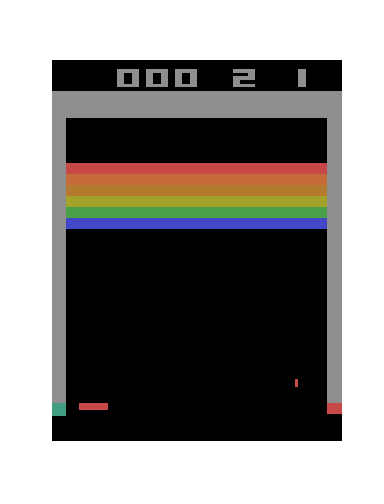
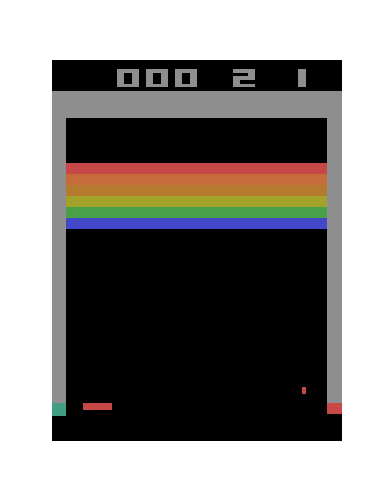
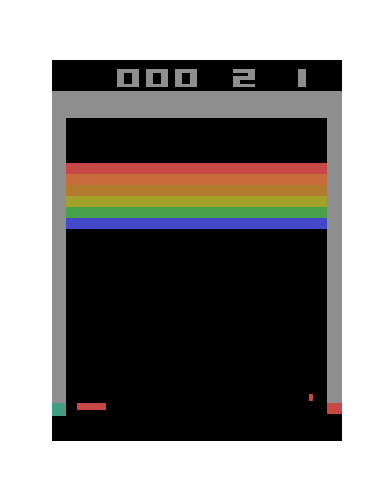
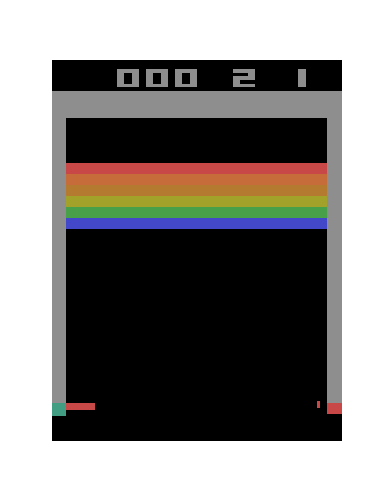
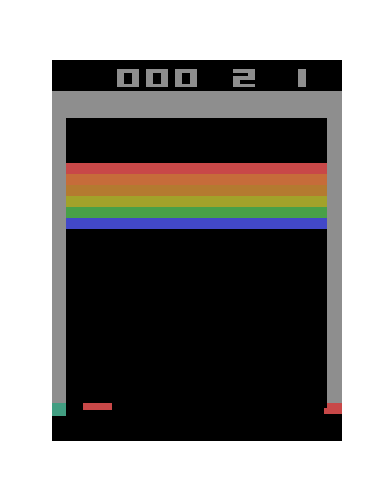
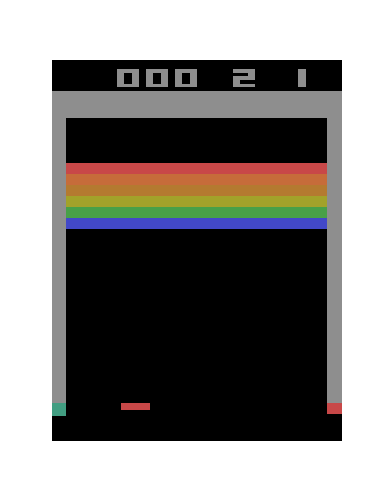
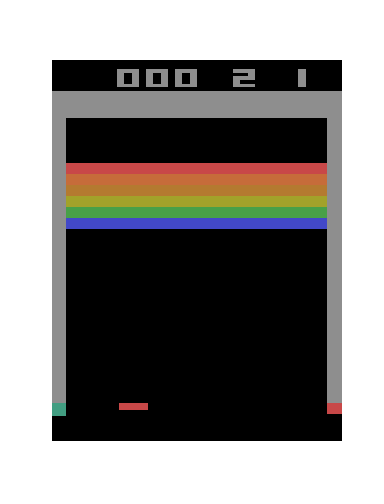
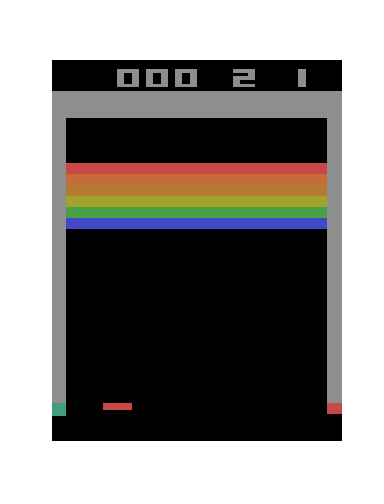
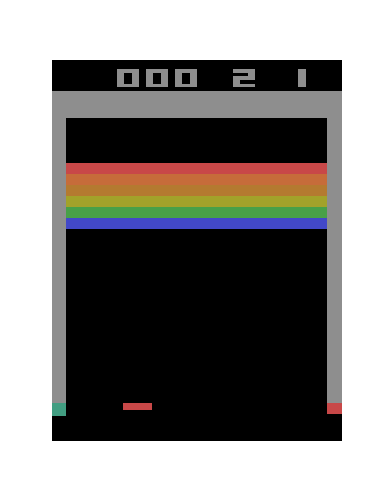
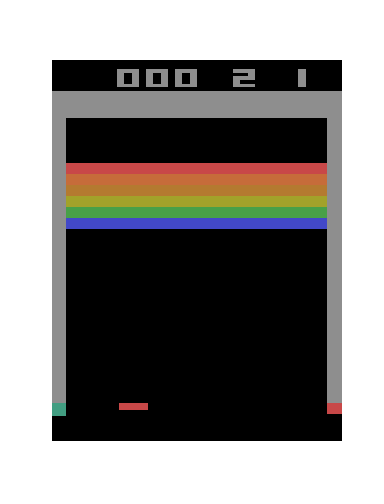
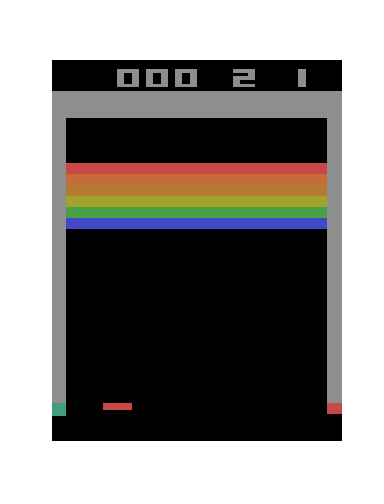
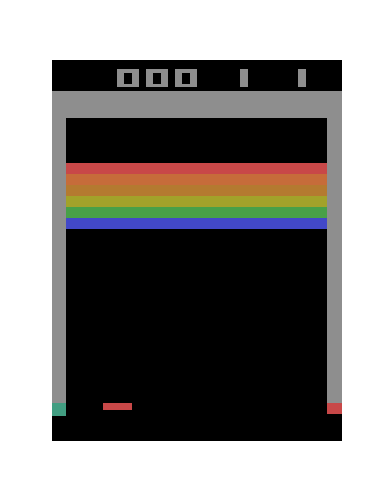
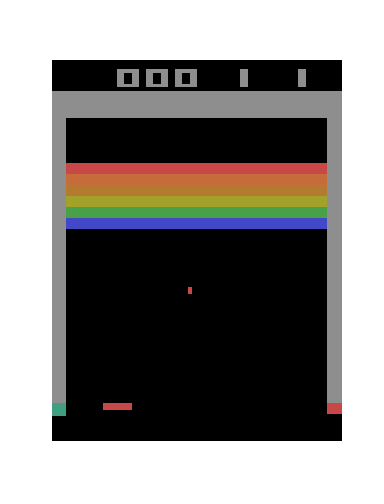
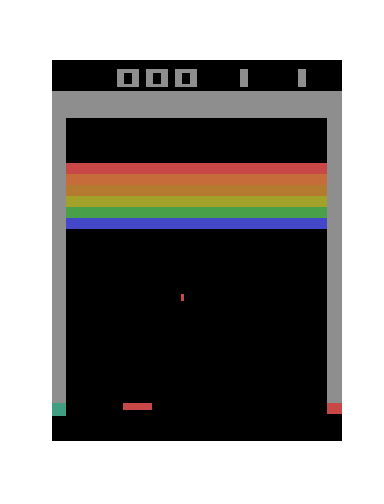
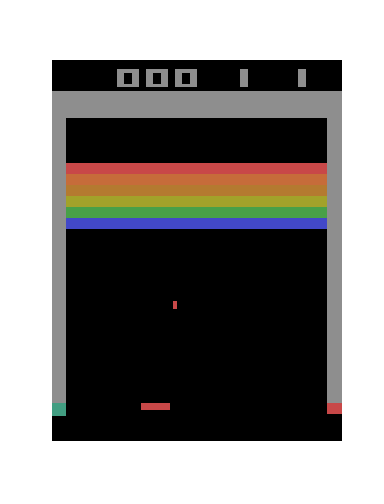
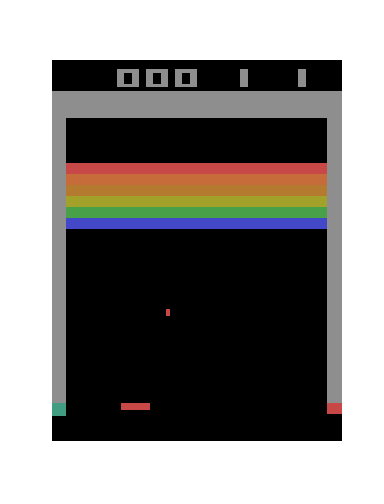
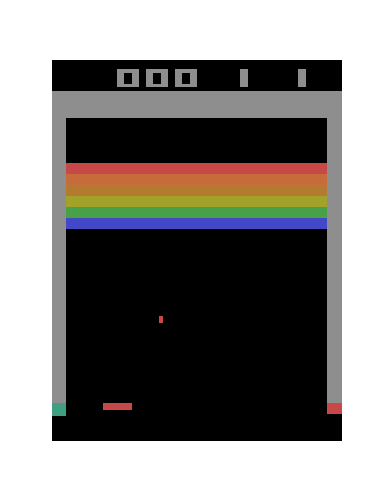
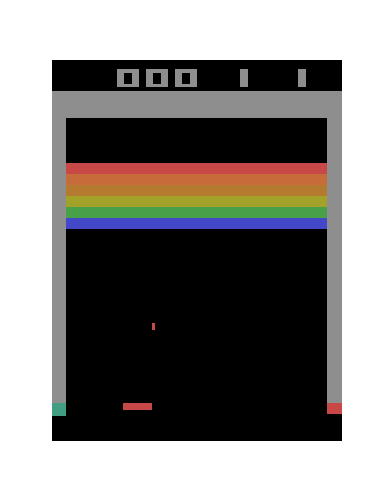
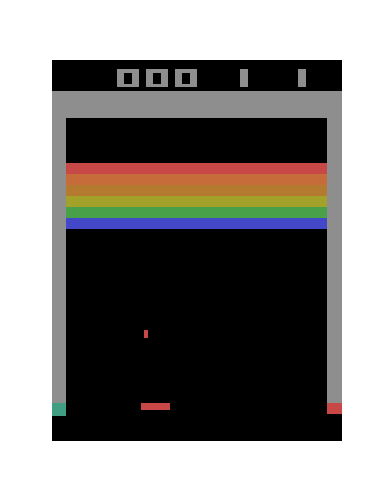
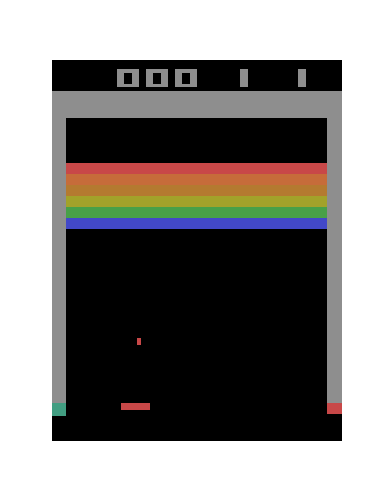
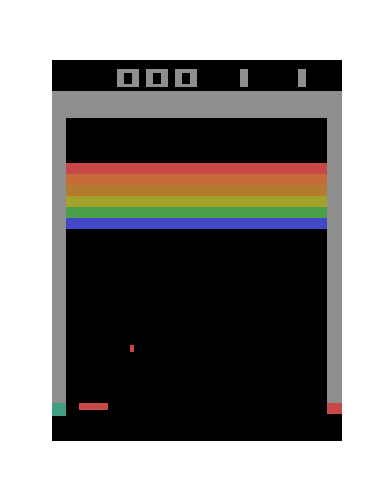
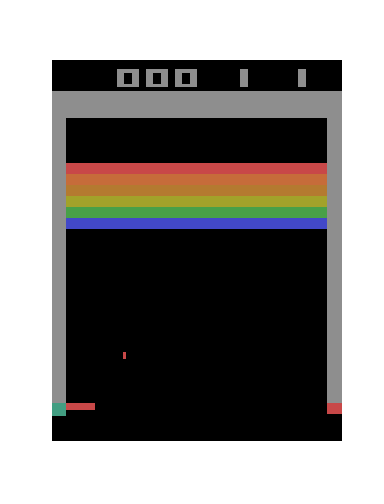
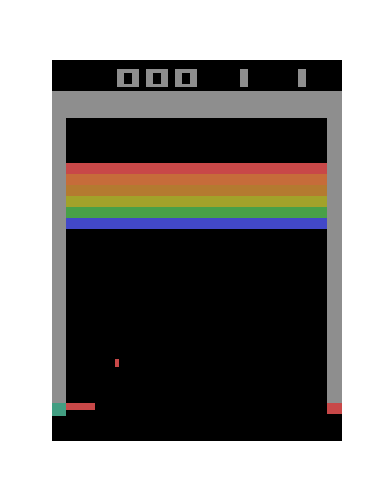
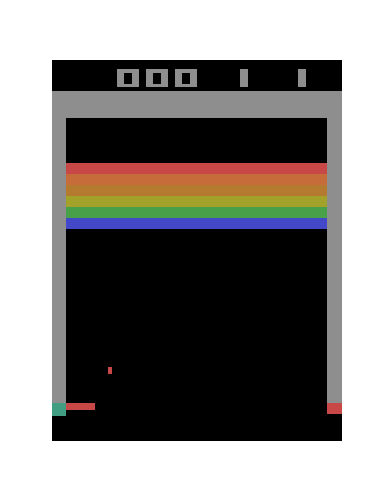
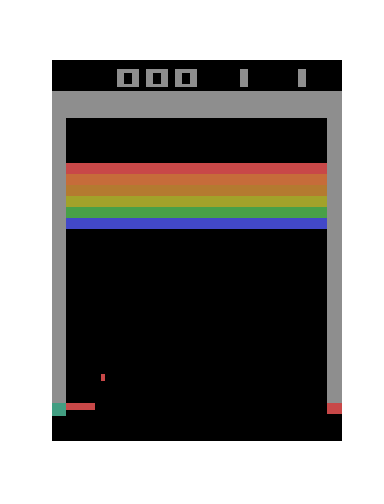
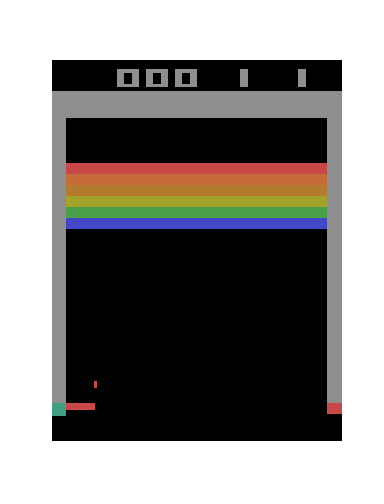
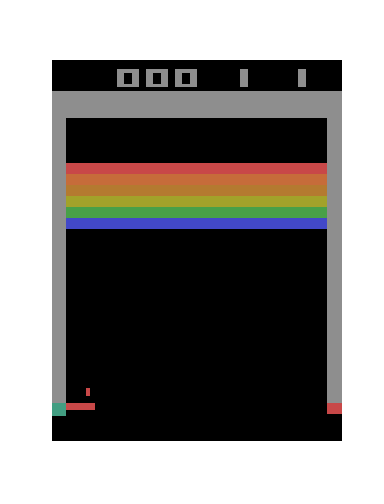
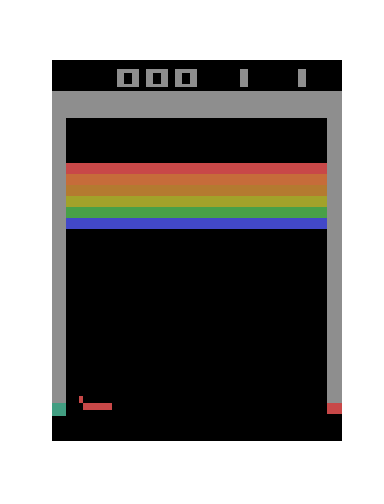
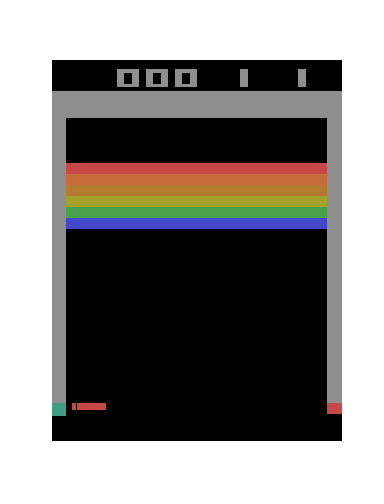
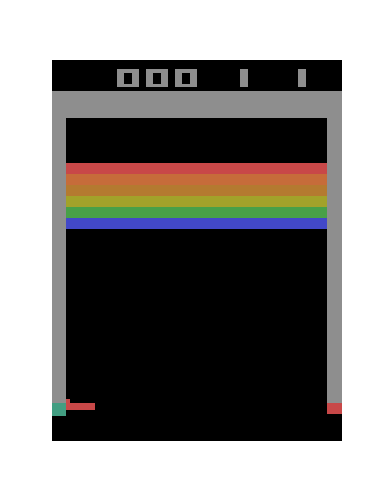
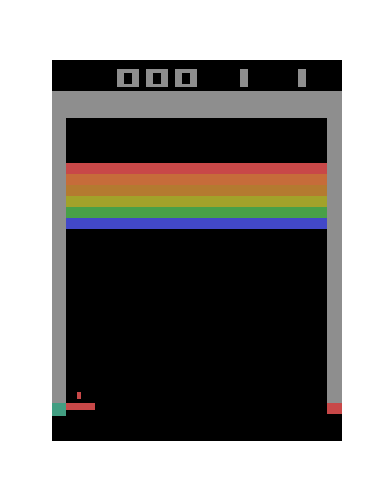
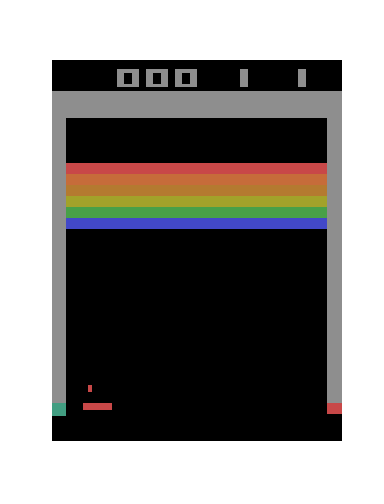
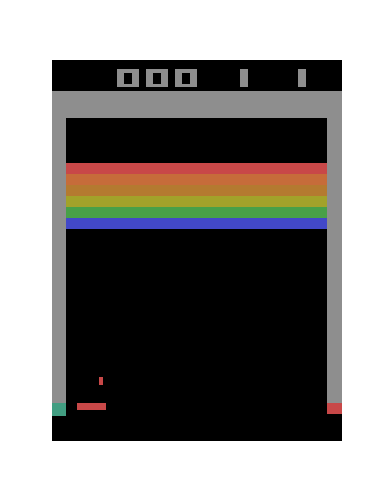
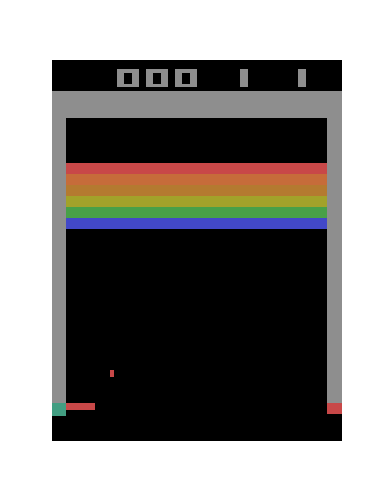
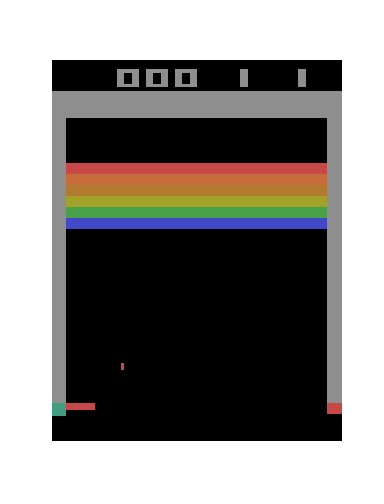
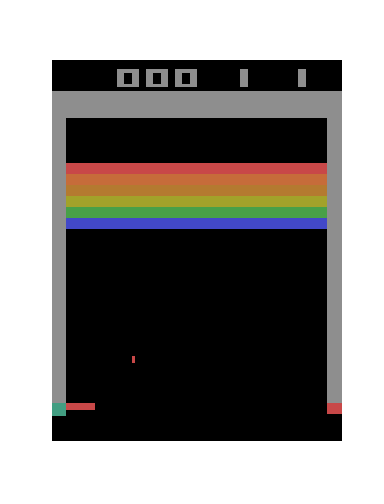
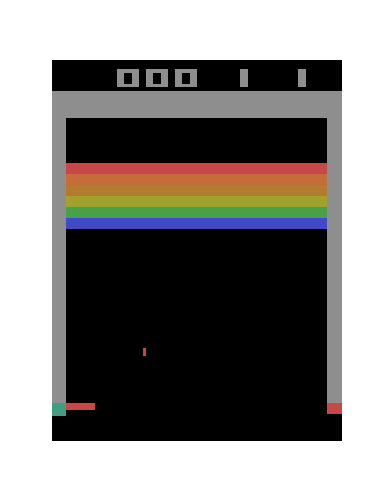
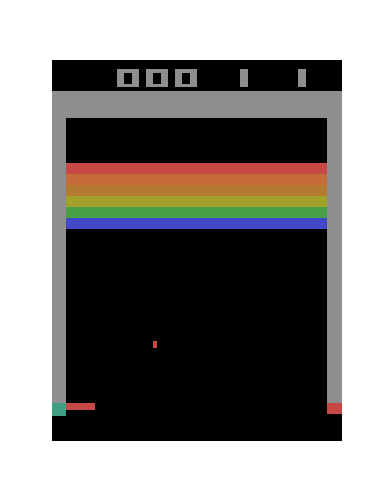
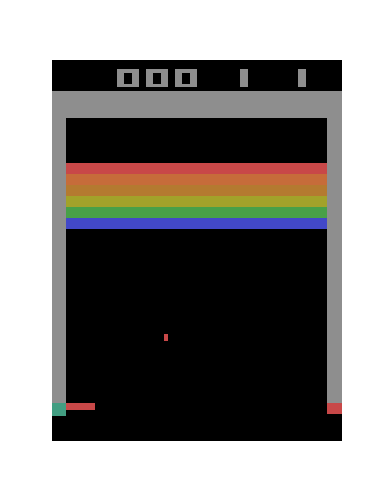
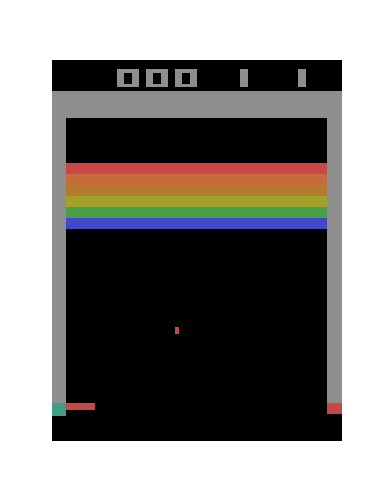
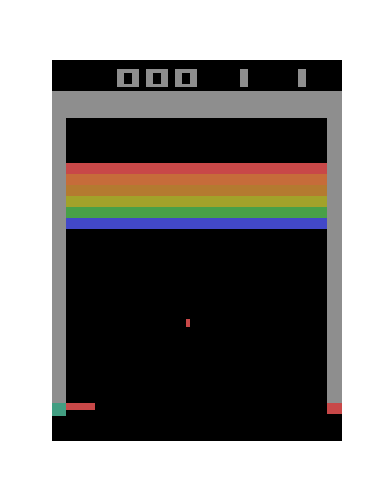
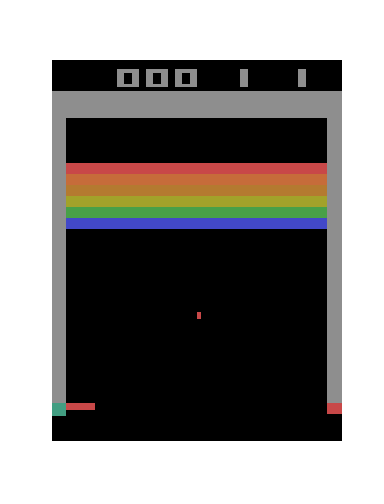
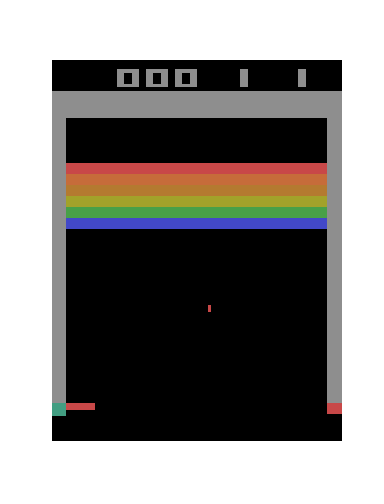
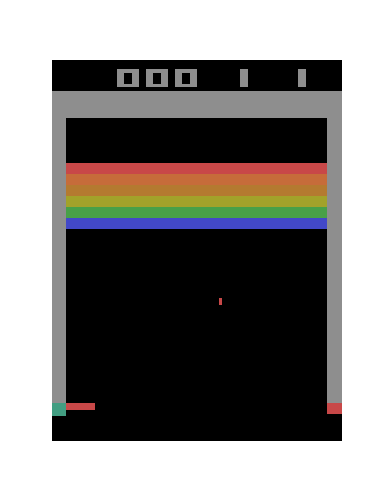
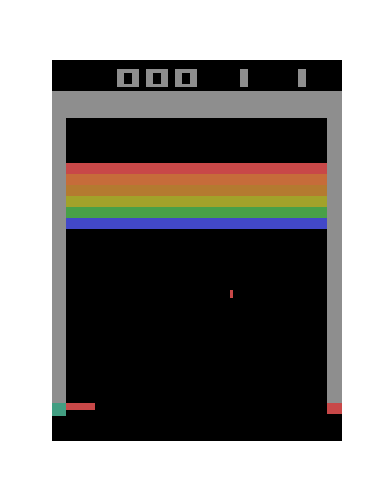
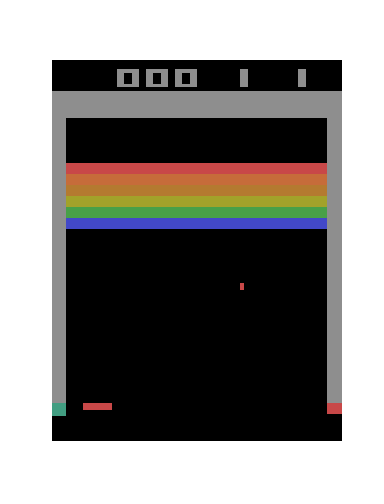
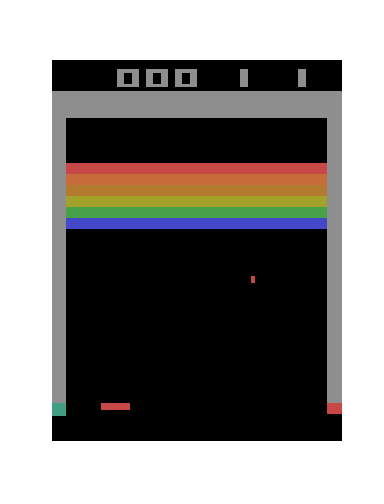
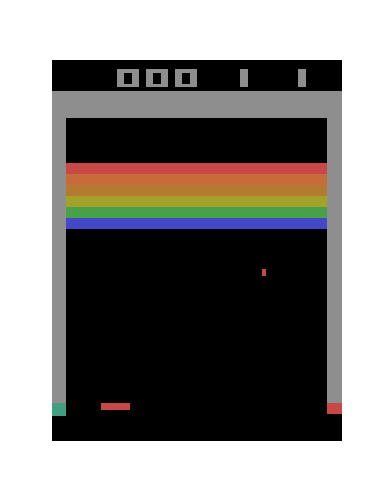
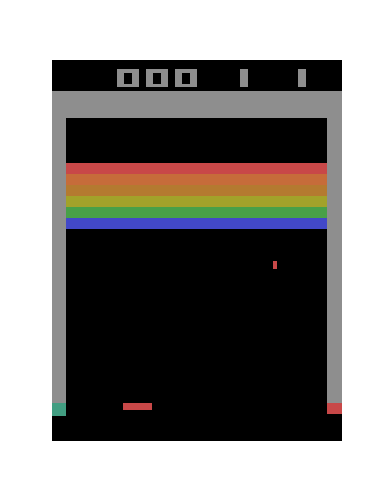
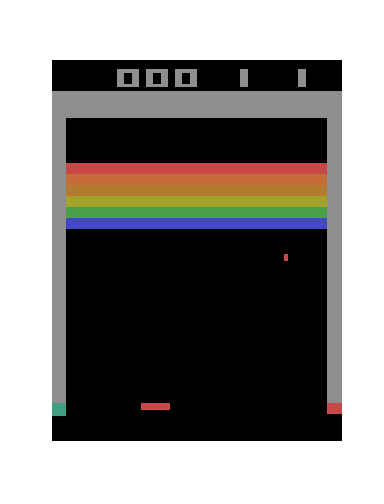
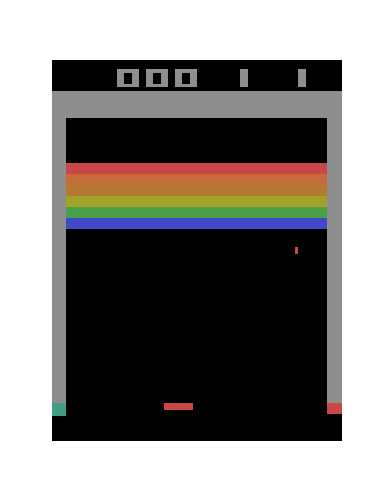
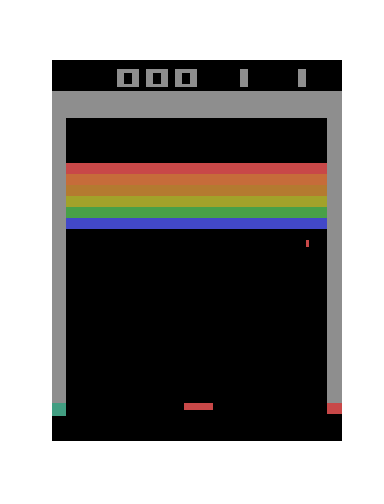
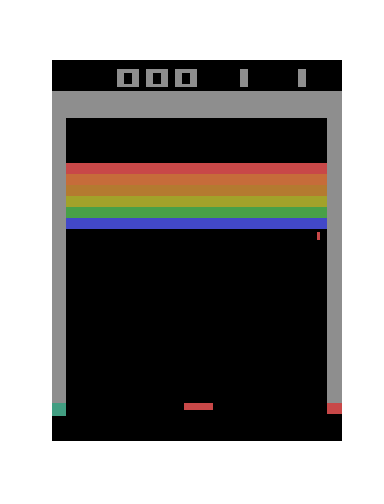
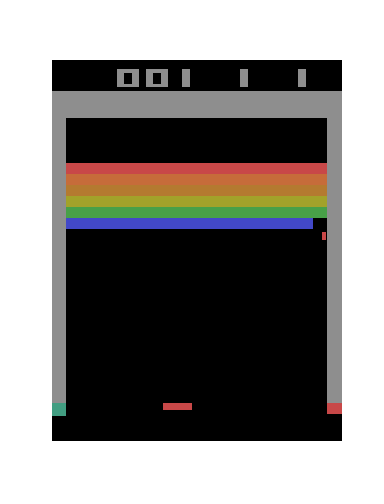
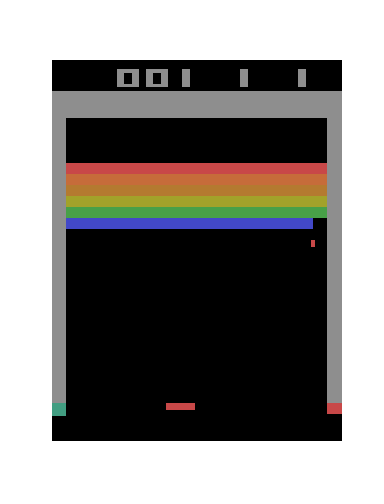
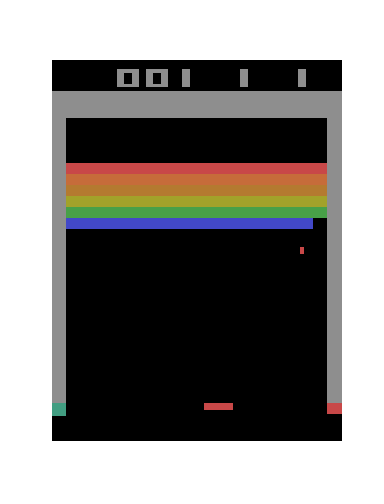
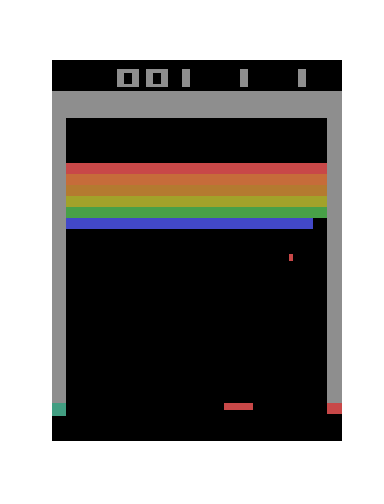
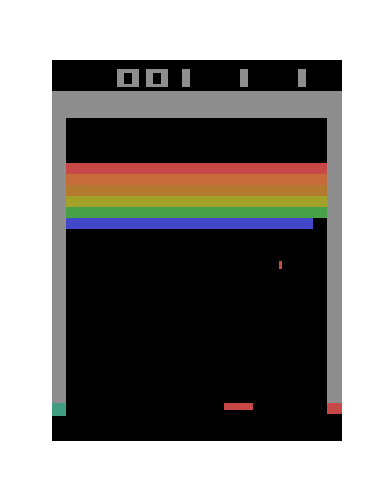
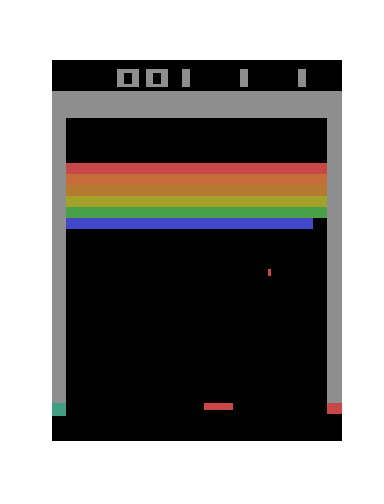
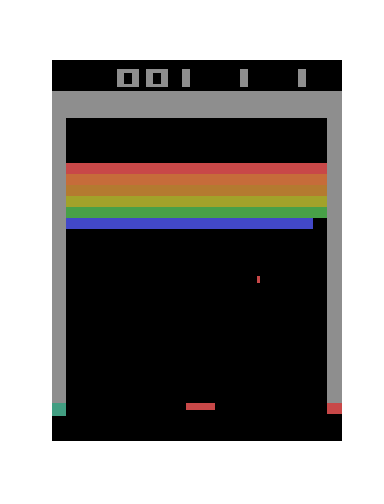
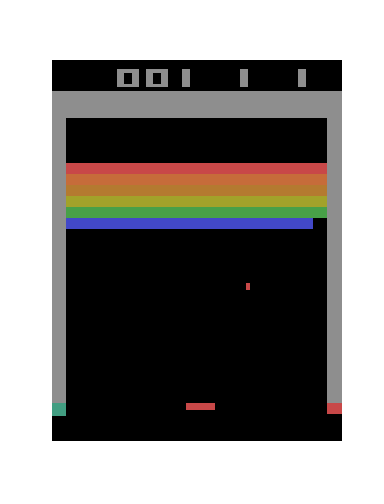
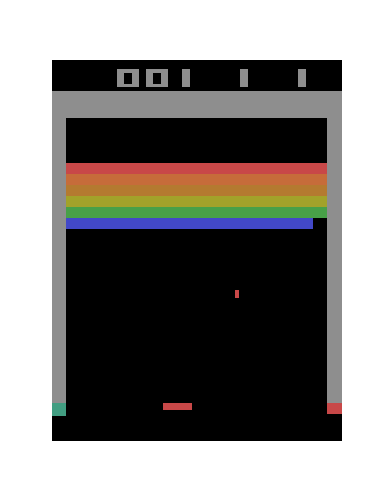
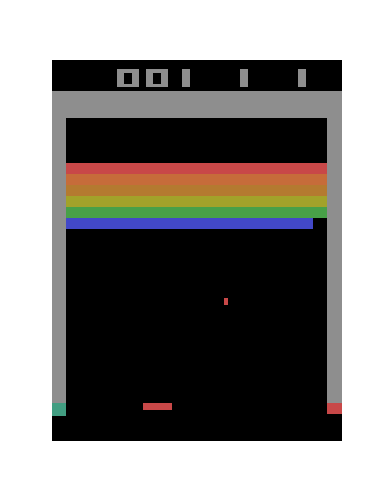
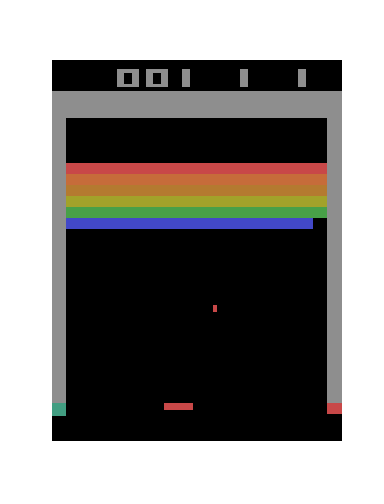
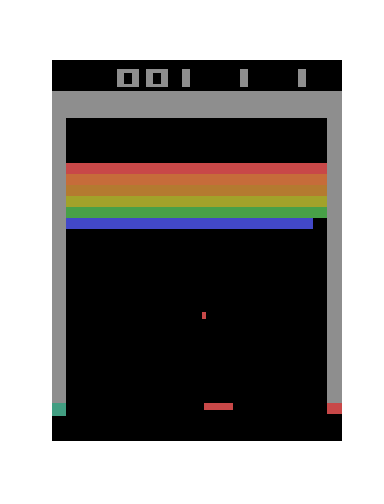
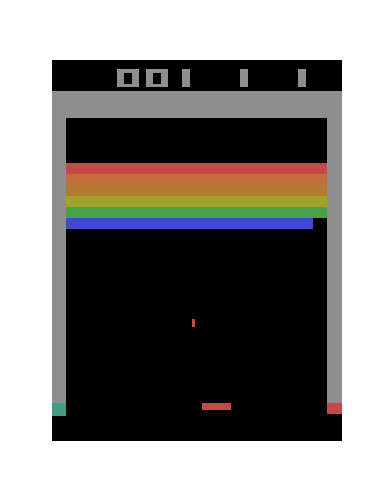
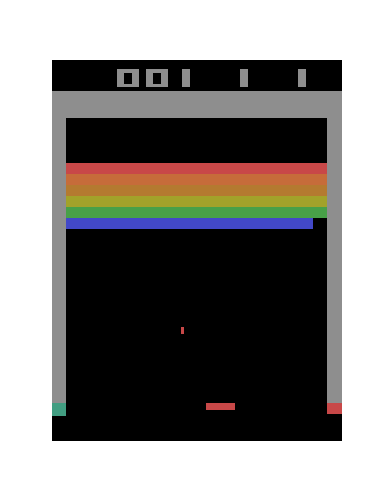
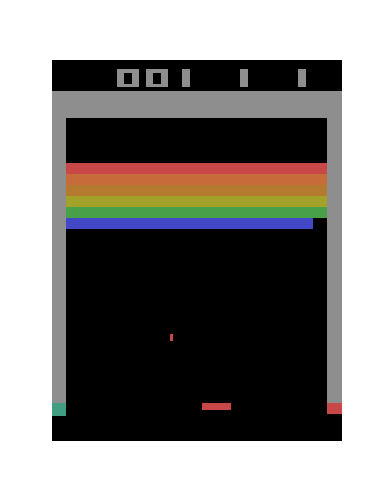
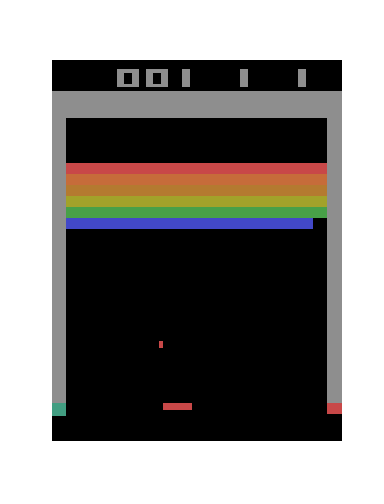
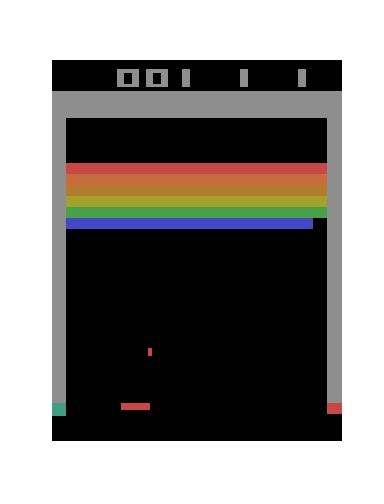
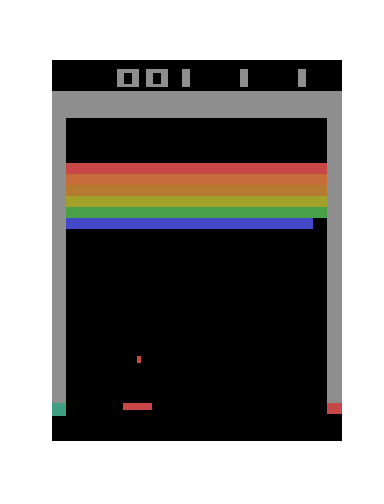
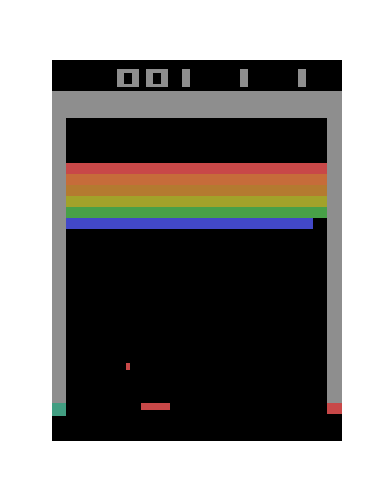
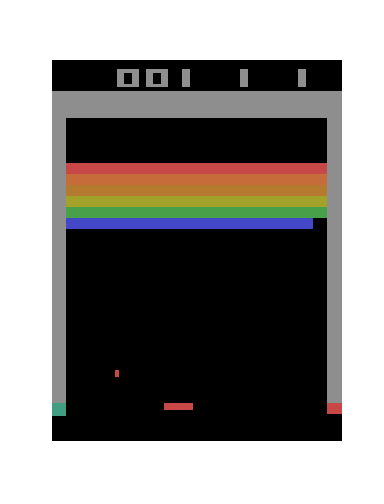
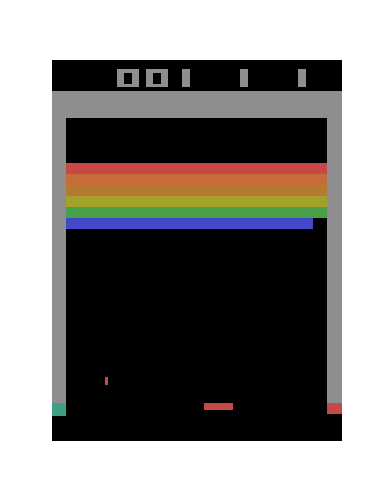
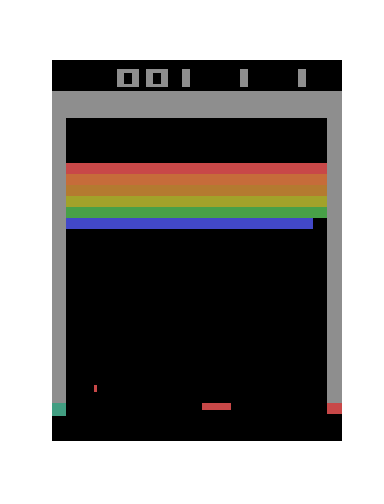
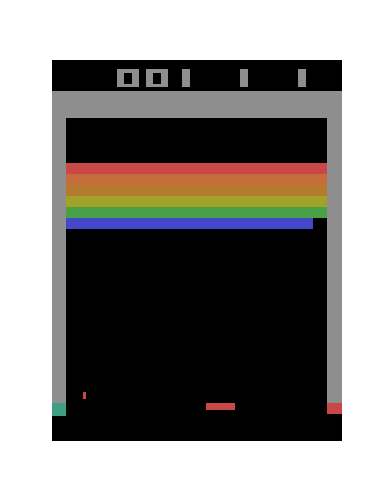
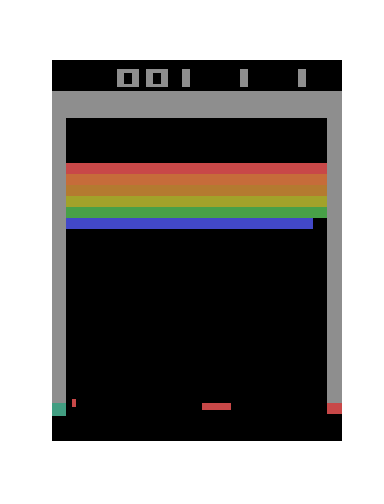
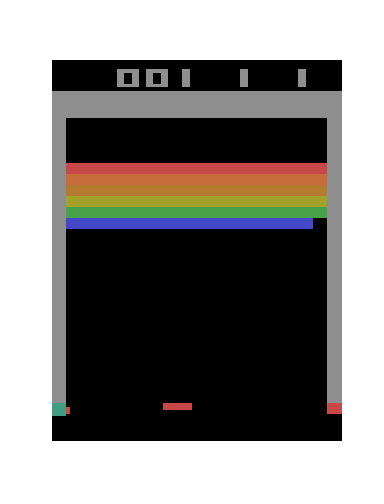
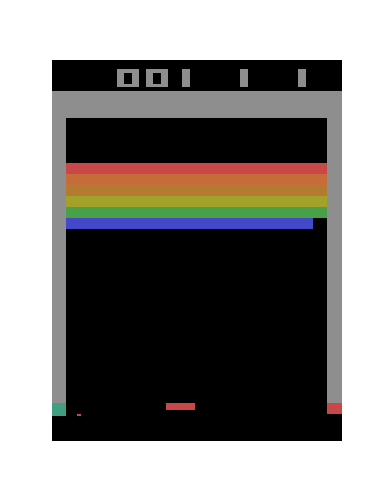
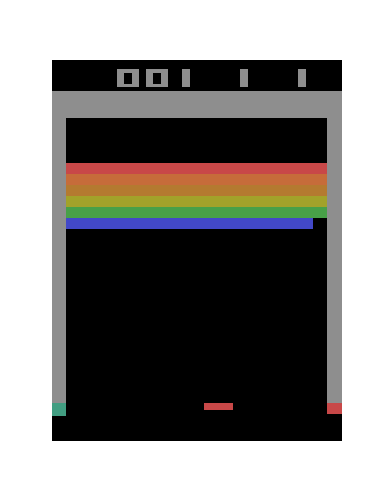
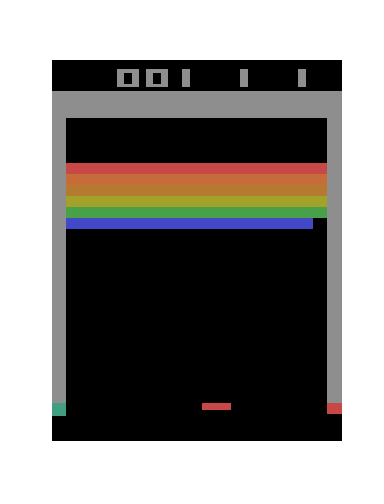
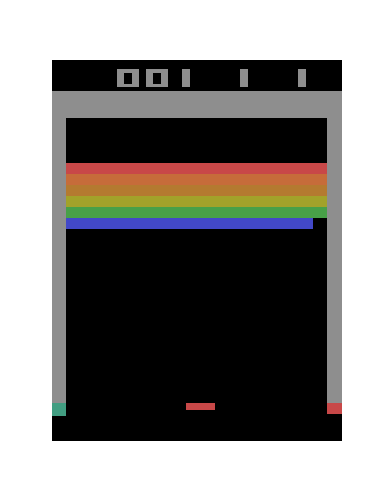
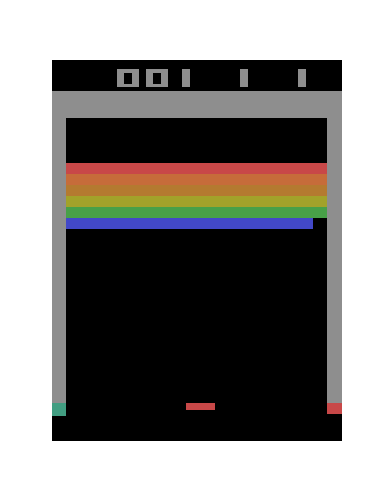
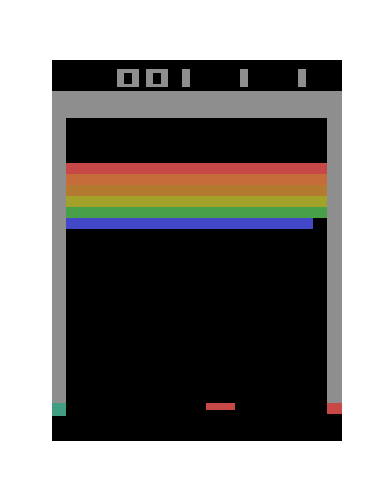

In [2]:
import gym

env = gym.make('BreakoutDeterministic-v4')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
done=False
while not done:
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

display_frames_as_gif(frames)

## Hyperparameters

In [3]:
from collections import deque

state_size = env.observation_space.shape
action_size = env.action_space.n

input_shape = (84, 84, 4)
batch_size = 32

learning_rate = 0.00001
gamma = 0.99

sum_q_max, sum_loss = 0, 0

# parameters about epsilon
exploration_rate_max, exploration_min = 1.0, 0.1
exploration_rate = exploration_rate_max

final_exploration_frame = 1000000
memory = deque(maxlen=10000)
n_stacked_frames = 4

# model
target_model = None
target_model_update_iteration = 10000

## Preprocessing

### Downsize and grayscale

In [4]:
from PIL import Image
#INPUT_SHAPE = (84, 84, 4)


def preprocess(img):
    img_pil=Image.fromarray(img)
    #Downsample
    preprocessed_img_pil=img_pil.resize((84,84))
    #Convert to grayscale
    preprocessed_img_pil=preprocessed_img_pil.convert("L")
    #To Numpy array
    preprocessed_img=np.array(preprocessed_img_pil)
    #Change datatype to save storage space
    preprocessed_img=preprocessed_img.astype("uint8")
    #print(preprocessed_img.shape)
    preprocessed_img=np.reshape(preprocessed_img, (1,) + preprocessed_img.shape)

    return preprocessed_img

### Stacking frames

In [5]:
def stack_frames(stacked_frames, frame, is_new_episode):
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque(maxlen=4)

        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)

        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=3)

    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=3)

    return stacked_state, stacked_frames

<img src="resources/breakout_before_preprocess.gif" style="width:300px" align="left">
<img src="resources/breakout_preprocessed.gif" style="width:300px;">


## Exploration

In [6]:
def update_epsilon(iteration):
    a = (exploration_rate_max - exploration_min) / final_exploration_frame
    b = exploration_rate_max
    exploration_rate = np.max([b - a * iteration, exploration_min])

In [7]:
def act(state, global_step):
    if (np.random.uniform() < exploration_rate or global_step<=replay_start_step):
        return np.random.random_integers(0, action_size - 1)
    q_values = model.predict([state, np.ones(action_size).reshape(1, action_size)])
    return np.argmax(q_values)

## Experience Replay
### Remember


In [8]:
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

### Replay (Training the model)

In [9]:
import random
import numpy as np

def sample_train_batch():
    state = np.zeros(((batch_size,) + input_shape))
    next_state = np.zeros(((batch_size,) + input_shape))
    action = np.zeros((batch_size,), dtype="uint8")
    reward = np.zeros((batch_size,), dtype="uint8")
    done = np.zeros((batch_size,), dtype="bool")

    sample_batch = random.sample(memory, batch_size)
    for i in range(batch_size):
        state[i] = sample_batch[i][0]
        next_state[i] = sample_batch[i][3]
        action[i] = sample_batch[i][1]
        reward[i] = sample_batch[i][2]
        done[i] = sample_batch[i][4]

    return state, next_state, action, reward, done


### Target network 
> Reinforcement learning is known to be unstable or even to diverge when a nonlinear function approximator such as a neural network is used to represent the action-value (also known as Q) function. This instability has several causes: the correlations present in the sequence of observations, the fact that small updates to Q may significantly change the policy and therefore change the data distribution, and the correlations between the action-values [...] and the target values [...]. We address these instabilities with a novel variant of Q-learning, which uses two key ideas. First, we used a biologically inspired mechanism termed experience replay that randomizes over the data, thereby removing correlations in the observation sequence and smoothing over changes in the data distribution [...]. Second, we used an iterative update that adjusts the action-values (Q) towards target values that are only periodically updated, thereby reducing correlations with the target.

In [10]:
from keras.utils import to_categorical
from keras.models import clone_model

def update_target_model():
    """Returns a copy of a keras model."""
    target_model = clone_model(model)
    target_model.set_weights(model.get_weights())
    return temp_model

def train_replay(iteration):

    if len(memory) < batch_size:
        return
    
    if iteration % target_model_update_iteration is 0:
        update_target_model()

    Q_target = np.zeros((batch_size, action_size))

    state, next_state, action, reward, done = sample_train_batch()
    next_Q = target_model.predict([next_state, np.ones((batch_size, action_size))])

    for i in range(batch_size):
        if done[i]:
            Q_target[i][action[i]] = reward[i]
        else:
            Q_target[i][action[i]] = reward[i] + gamma * np.amax(next_Q[i])

    action_one_hot=to_categorical(action, num_classes=action_size)
    Q_target_one_hot = action_one_hot * Q_target
    
    model.fit([state, action_one_hot], Q_target_one_hot, batch_size=batch_size, epochs=1, verbose=0)

    update_epsilon(iteration)

C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Model

In [11]:
from keras import backend as K

def huber_loss(a, b, in_keras=True):
    error = a - b
    quadratic_term = error * error / 2
    linear_term = abs(error) - 1 / 2
    use_linear_term = (abs(error) > 1.0)
    if in_keras:
        # Keras won't let us multiply floats by booleans, so we explicitly cast the booleans to floats
        use_linear_term = K.cast(use_linear_term, 'float32')
    return use_linear_term * linear_term + (1 - use_linear_term) * quadratic_term

<img src="resources/huber.png" style="width:500px;">


$L=\begin{bmatrix}
   0\\
   0\\
   q_{target}\\
   0\\
\end{bmatrix}-\begin{bmatrix}
   q_1\\
   q_2\\
   q_3\\
   q_4\\
\end{bmatrix}=\begin{bmatrix}
   -q_1\\
   -q_2\\
   q_{target}-q_3\\
   -q_4\\
\end{bmatrix}$

$L=\begin{bmatrix}
   q_1\\
   q_2\\
   q_{target}\\
   q_4\\
\end{bmatrix}-\begin{bmatrix}
   q_1\\
   q_2\\
   q_3\\
   q_4\\
\end{bmatrix}=\begin{bmatrix}
   0\\
   0\\
   q_{target}-q_3\\
   0\\
\end{bmatrix}$

In [12]:
from keras.layers import Conv2D, Flatten, Multiply
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.optimizers import Adam

input = Input(shape=input_shape, name='frames')
actions_input = Input((action_size,), name='mask')
normalized = Lambda(lambda x: x / 255.0)(input)

conv_1 = Conv2D(16, 8, 8, subsample=(4, 4), activation='relu')(normalized)
conv_2 = Conv2D(32, 4, 4, subsample=(2, 2), activation='relu')(conv_1)
conv_flattened = Flatten()(conv_2)
hidden = Dense(units=256, activation='relu')(conv_flattened)
output = Dense(output_dim=action_size, activation='linear')(hidden)

filtered_output = Multiply(name="Qvalue")([output, actions_input])
model = Model(input=[input, actions_input], output=filtered_output)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss=huber_loss)
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
frames (InputLayer)             (None, 84, 84, 4)    0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 84, 84, 4)    0           frames[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 20, 16)   4112        lambda_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 9, 9, 32)     8224        conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 

C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (8, 8), activation="relu", strides=(4, 4))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", strides=(2, 2))`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="linear")`
  
C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("Qv...)`


## Putting All together

### Training

In [13]:
from enum import Enum

class STATUS(Enum):
    OBSERVING = 1
    EXPLORING = 2
    TRAINING = 3

def getStatus():
    if global_step <= replay_start_step:
        return STATUS.OBSERVING
    elif global_step <= (replay_start_step + final_exploration_frame):
        return STATUS.EXPLORING
    else:
        return STATUS.TRAINING

In [17]:
import logging as log
import time
import traceback
log.basicConfig(level=log.INFO)

env = gym.make('BreakoutDeterministic-v4')
target_model=model

episodes = 10
replay_start_step=50
memory=deque(maxlen=1000)

try:
    global_step = 0
    frames=[]

    for episode in range(episodes):
        done = False
        dead = False

        score = 0
        step = 0
        start_life = 5

        start = time.time()

        env.reset()
        frame, _, _, _ = env.step(1)
        preprocessed_frame=preprocess(frame)
        state, stacked_frames = stack_frames(None, preprocessed_frame, is_new_episode=True)
        while not done:

            frame = env.render(mode = 'rgb_array')
            frames.append(frame)
            action = act(state, global_step)
            observation, reward, done, info = env.step(action)

            if start_life > info['ale.lives']:
                dead = True
                start_life = info['ale.lives']
                
            preprocessed_frame=preprocess(frame)

            next_state, stacked_frames = stack_frames(stacked_frames, preprocessed_frame,
                                                                        is_new_episode=False)
            remember(state, action, reward, next_state, dead)
            
            if dead:
                dead = False
            
            state = next_state

            score += reward
            step += 1
            global_step += 1

            if getStatus() != STATUS.OBSERVING:
                train_replay(global_step)

            if done:
                end = time.time()

                print(
                    "state: %s episode: %s score: %.2f memory length: %.0f/%.0f epsilon: %.3f global_step:%.0f"
                    % (
                        getStatus().name, episode, score, len(memory),
                        memory.maxlen,
                        exploration_rate, global_step))
except Exception as e:
    print(e)
    traceback.print_exc()          

display_frames_as_gif(frames)


C:\Users\cenarugu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


state: EXPLORING episode: 0 score: 0.00 memory length: 133/1000 epsilon: 1.000 global_step:133
state: EXPLORING episode: 1 score: 2.00 memory length: 339/1000 epsilon: 1.000 global_step:339
state: EXPLORING episode: 2 score: 0.00 memory length: 470/1000 epsilon: 1.000 global_step:470
state: EXPLORING episode: 3 score: 0.00 memory length: 597/1000 epsilon: 1.000 global_step:597
state: EXPLORING episode: 4 score: 0.00 memory length: 725/1000 epsilon: 1.000 global_step:725
state: EXPLORING episode: 5 score: 0.00 memory length: 854/1000 epsilon: 1.000 global_step:854
state: EXPLORING episode: 6 score: 2.00 memory length: 1000/1000 epsilon: 1.000 global_step:1082
state: EXPLORING episode: 7 score: 2.00 memory length: 1000/1000 epsilon: 1.000 global_step:1281
state: EXPLORING episode: 8 score: 2.00 memory length: 1000/1000 epsilon: 1.000 global_step:1490


INFO:matplotlib.animation:Animation.save using <class 'JSAnimation.html_writer.HTMLWriter'>


state: EXPLORING episode: 9 score: 0.00 memory length: 1000/1000 epsilon: 1.000 global_step:1623


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
